In [2]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
import datetime as dt
import yfinance as yf 
import pandas_ta 
import warnings
warnings.filterwarnings('ignore')

In [12]:
# pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0] #[0] to get just the symbol information


In [15]:
# extract the symbols from the dataframe.
sp500['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [17]:
# Clean the data - some symbols are have . and we want to replace them by -
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

In [20]:
# remove duplicates from the symbol and add it to the list.
symbols_list = sp500['Symbol'].unique().tolist()

In [23]:
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA

In [30]:
# download data of these stocks 
end= dt.datetime.now()
end_date = pd.to_datetime(end)
# start = dt.datetime(2023,10,10)
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)

end_date


Timestamp('2024-01-16 11:20:37.279076')

In [31]:
# download using yfinance
df = yf.download(tickers=symbols_list,
                 start= start_date,
                 end= end_date)

df

[*********************100%%**********************]  503 of 503 completed


Adj Close                                                 \
                     A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2016-01-19   34.863625  37.136387   21.999647   38.960144         NaN   
2016-01-20   34.919849  37.327518   22.029240   40.490482         NaN   
2016-01-21   34.891747  38.025131   21.917711   41.347767         NaN   
2016-01-22   35.594627  38.378727   23.083012   41.680763         NaN   
2016-01-25   35.247871  37.155502   22.632368   41.553234         NaN   
...                ...        ...         ...         ...         ...   
2024-01-09  130.679993  14.380000  185.139999  160.773911  139.529999   
2024-01-10  131.089996  14.350000  186.190002  163.329498  139.759995   
2024-01-11  129.679993  14.590000  185.589996  162.229996  139.449997   
2024-01-12  130.539993  13.210000  185.919998  162.399994  137.139999   
2024-01-16         NaN        NaN         NaN         NaN         NaN   

                                                                       ...  \
                   ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                   ...   
2016-01-19   34.855438  22.250000   89.207146   89.180000   41.897419  ...   
2016-01-20   34.450237  21.629999   87.165695   87.940002   42.906887  ...   
2016-01-21   34.036415  21.663334   86.488167   88.000000   42.864464  ...   
2016-01-22   34.510590  21.770000   89.963890   89.629997   43.585522  ...   
2016-01-25   34.191605  22.013332   89.532700   86.769997   43.305576  ...   
...                ...        ...         ...         ...         ...  ...   
2024-01-09  112.188026  76.150002  342.750000  586.200012  189.759995  ...   
2024-01-10  113.849998  76.959999  345.329987  591.030029  188.369995  ...   
2024-01-11  113.500000  77.620003  347.970001  597.489990  188.960007  ...   
2024-01-12  113.919998  77.690002  356.329987  596.539978  188.360001  ...   
2024-01-16         NaN        NaN         NaN         NaN         NaN  ...   

               Volume                                                          \
                 WYNN        XEL         XOM       XRAY        XYL        YUM   
Date                                                                            
2016-01-19  5851500.0  5422500.0  22684500.0  1584300.0  1068500.0  9644777.0   
2016-01-20  6212900.0  5464400.0  33300800.0  2149800.0  1489200.0  7391218.0   
2016-01-21  4076600.0  5359200.0  22265600.0  1639900.0  1444200.0  5885738.0   
2016-01-22  3590000.0  4531000.0  22530300.0   812900.0   827500.0  7474399.0   
2016-01-25  5654000.0  2343100.0  17086600.0   839000.0  1133900.0  6917026.0   
...               ...        ...         ...        ...        ...        ...   
2024-01-09  1803300.0  3510800.0  19496600.0  4458800.0   947700.0   968400.0   
2024-01-10  1683500.0  3341200.0  18206100.0  4599500.0   851000.0  1208700.0   
2024-01-11  1871000.0  3825900.0  15833400.0  2337400.0  1036100.0  1271600.0   
2024-01-12  1913700.0  2753600.0  18032100.0  1937200.0  1233100.0  1080800.0   
2024-01-16        NaN        NaN         NaN        NaN        NaN        NaN   

                                                        
                  ZBH       ZBRA       ZION        ZTS  
Date                                                    
2016-01-19  1928263.0  1211300.0  3933700.0  4595000.0  
2016-01-20  1755223.0  1720000.0  5413800.0  5212900.0  
2016-01-21   968715.0   784600.0  4564800.0  3777400.0  
2016-01-22   949248.0   536000.0  3626300.0  3397500.0  
2016-01-25  1104469.0   952800.0  5023400.0  2364200.0  
...               ...        ...        ...        ...  
2024-01-09  2921800.0   326600.0  1388200.0  1983200.0  
2024-01-10  1680000.0   276900.0  1454600.0  1325200.0  
2024-01-11  1643100.0   380900.0  1980000.0  1589500.0  
2024-01-12  1735800.0   625600.0  1713500.0  1726500.0  
2024-01-16        NaN

In [35]:
# Save the file to csv and json.
# df.to_csv('/Users/shrikanthnallapati/Projects/stock_app/Data/SP500.csv')
# df.to_json('/Users/shrikanthnallapati/Projects/stock_app/Data/SP500.json')

In [37]:
df = df.stack() #to create multi index with Date and Symbol

In [40]:
df.index.names = ['date', 'ticker'] # assign new index names multi
# change the names of the columns from Title to lower case
df.columns = df.columns.str.lower()

In [41]:
df

adj close        close         high          low  \
date       ticker                                                       
2016-01-19 A         34.863625    37.200001    37.919998    36.790001   
           AAL       37.136387    38.860001    39.779999    38.209999   
           AAPL      21.999647    24.165001    24.662500    23.875000   
           ABBV      38.960144    54.990002    57.730000    54.230000   
           ABT       34.855438    40.430000    41.320000    40.130001   
...                        ...          ...          ...          ...   
2024-01-16 TDG     1020.599976  1020.599976  1033.649902  1017.799988   
           TDY      438.085205   438.085205   438.790009   436.024994   
           TYL      426.274994   426.274994   429.399994   426.075012   
           WAT      308.130005   308.130005   309.089996   301.600006   
           WTW      246.679993   246.679993   248.119995   245.740005   

                          open       volume  
date       ticker                            
2016-01-19 A         37.639999    2506500.0  
           AAL       39.590000   10505900.0  
           AAPL      24.602501  212350800.0  
           ABBV      57.529999   13644500.0  
           ABT       41.099998    7997300.0  
...                        ...          ...  
2024-01-16 TDG     1029.160034      41372.0  
           TDY      438.769989      21599.0  
           TYL      427.000000      27840.0  
           WAT      305.000000      80746.0  
           WTW      248.110001     126048.0  

[994224 rows x 6 columns]

# Calculate Features and Technical indicators for each stock 
1. Garman - Klass Volatility (generally used for forex trading)
2. RSI
3. Bollinger Bands 
4. ATR 
5. MACD
6. Dollar Volume

In [43]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2 - (2*np.log(2)-1)*((np.log(df['adj close'])) - np.log(df['open']))**2

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df

adj close        close         high          low  \
date       ticker                                                       
2016-01-19 A         34.863625    37.200001    37.919998    36.790001   
           AAL       37.136387    38.860001    39.779999    38.209999   
           AAPL      21.999647    24.165001    24.662500    23.875000   
           ABBV      38.960144    54.990002    57.730000    54.230000   
           ABT       34.855438    40.430000    41.320000    40.130001   
...                        ...          ...          ...          ...   
2024-01-16 TDG     1020.599976  1020.599976  1033.649902  1017.799988   
           TDY      438.085205   438.085205   438.790009   436.024994   
           TYL      426.274994   426.274994   429.399994   426.075012   
           WAT      308.130005   308.130005   309.089996   301.600006   
           WTW      246.679993   246.679993   248.119995   245.740005   

                          open       volume  garman_klass_vol        rsi  
date       ticker                                                         
2016-01-19 A         37.639999    2506500.0         -0.001810        NaN  
           AAL       39.590000   10505900.0         -0.000771        NaN  
           AAPL      24.602501  212350800.0         -0.004304        NaN  
           ABBV      57.529999   13644500.0         -0.056729        NaN  
           ABT       41.099998    7997300.0         -0.010064        NaN  
...                        ...          ...               ...        ...  
2024-01-16 TDG     1029.160034      41372.0          0.000092  62.252597  
           TDY      438.769989      21599.0          0.000019  61.224385  
           TYL      427.000000      27840.0          0.000029  60.182207  
           WAT      305.000000      80746.0          0.000261  53.459163  
           WTW      248.110001     126048.0          0.000034  60.047113  

[994224 rows x 8 columns]

In [46]:
# df.xs('TSLA', level=1)['rsi'].plot() # for plotting the RSI of each stock

In [47]:
# Calculate Bollinger Bands using panda_ta library
pandas_ta.bbands(close=df.xs('AAPL', level=1)['adj close'], length=20)

BBL_20_2.0  BBM_20_2.0  BBU_20_2.0  BBB_20_2.0  BBP_20_2.0
date                                                                  
2016-01-19         NaN         NaN         NaN         NaN         NaN
2016-01-20         NaN         NaN         NaN         NaN         NaN
2016-01-21         NaN         NaN         NaN         NaN         NaN
2016-01-22         NaN         NaN         NaN         NaN         NaN
2016-01-25         NaN         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2024-01-08  181.723686  192.201501  202.679316   10.902948    0.183068
2024-01-09  180.894392  191.673000  202.451608   11.246871    0.196946
2024-01-10  180.312223  191.323501  202.334779   11.510638    0.266898
2024-01-11  179.700700  190.867500  202.034300   11.701102    0.263697
2024-01-12  179.398917  190.265500  201.132083   11.422547    0.300052

[2011 rows x 5 columns]

In [54]:
df['bb_low']=df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df['bb_mid']=df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df['bb_high']=df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])
df

adj close        close         high          low  \
date       ticker                                                       
2016-01-19 A         34.863625    37.200001    37.919998    36.790001   
           AAL       37.136387    38.860001    39.779999    38.209999   
           AAPL      21.999647    24.165001    24.662500    23.875000   
           ABBV      38.960144    54.990002    57.730000    54.230000   
           ABT       34.855438    40.430000    41.320000    40.130001   
...                        ...          ...          ...          ...   
2024-01-16 TDG     1020.599976  1020.599976  1033.649902  1017.799988   
           TDY      438.085205   438.085205   438.790009   436.024994   
           TYL      426.274994   426.274994   429.399994   426.075012   
           WAT      308.130005   308.130005   309.089996   301.600006   
           WTW      246.679993   246.679993   248.119995   245.740005   

                          open       volume  garman_klass_vol        rsi  \
date       ticker                                                          
2016-01-19 A         37.639999    2506500.0         -0.001810        NaN   
           AAL       39.590000   10505900.0         -0.000771        NaN   
           AAPL      24.602501  212350800.0         -0.004304        NaN   
           ABBV      57.529999   13644500.0         -0.056729        NaN   
           ABT       41.099998    7997300.0         -0.010064        NaN   
...                        ...          ...               ...        ...   
2024-01-16 TDG     1029.160034      41372.0          0.000092  62.252597   
           TDY      438.769989      21599.0          0.000019  61.224385   
           TYL      427.000000      27840.0          0.000029  60.182207   
           WAT      305.000000      80746.0          0.000261  53.459163   
           WTW      248.110001     126048.0          0.000034  60.047113   

                     bb_low    bb_mid   bb_high  
date       ticker                                
2016-01-19 A            NaN       NaN       NaN  
           AAL          NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
...                     ...       ...       ...  
2024-01-16 TDG     6.876460  6.908422  6.940385  
           TDY     6.049615  6.080115  6.110615  
           TYL     5.994857  6.029545  6.064233  
           WAT     5.696056  5.766076  5.836096  
           WTW     5.456404  5.486480  5.516556  

[994224 rows x 11 columns]

In [55]:
# Calculate ATR. Since ATR requires 3 inputs, we cannot use Groupby and transform method, but rather need to use Groupby and apply menthod
# pandas_ta.atr(high=df['high'],low = df['low'],close = df['close'],length = 14)
# lets define a new function to compute ATR. 
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],low = stock_data['low'],close = stock_data['close'],length = 14)
    return atr.sub(atr.mean()).div(atr.std()) # Normalize the data as we will be using ML model at a later step like clustering 

#add a new columne atr to the df
df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr) # we need to add group_key as False, else it will double the date column

df

adj close        close         high          low  \
date       ticker                                                       
2016-01-19 A         34.863625    37.200001    37.919998    36.790001   
           AAL       37.136387    38.860001    39.779999    38.209999   
           AAPL      21.999647    24.165001    24.662500    23.875000   
           ABBV      38.960144    54.990002    57.730000    54.230000   
           ABT       34.855438    40.430000    41.320000    40.130001   
...                        ...          ...          ...          ...   
2024-01-16 TDG     1020.599976  1020.599976  1033.649902  1017.799988   
           TDY      438.085205   438.085205   438.790009   436.024994   
           TYL      426.274994   426.274994   429.399994   426.075012   
           WAT      308.130005   308.130005   309.089996   301.600006   
           WTW      246.679993   246.679993   248.119995   245.740005   

                          open       volume  garman_klass_vol        rsi  \
date       ticker                                                          
2016-01-19 A         37.639999    2506500.0         -0.001810        NaN   
           AAL       39.590000   10505900.0         -0.000771        NaN   
           AAPL      24.602501  212350800.0         -0.004304        NaN   
           ABBV      57.529999   13644500.0         -0.056729        NaN   
           ABT       41.099998    7997300.0         -0.010064        NaN   
...                        ...          ...               ...        ...   
2024-01-16 TDG     1029.160034      41372.0          0.000092  62.252597   
           TDY      438.769989      21599.0          0.000019  61.224385   
           TYL      427.000000      27840.0          0.000029  60.182207   
           WAT      305.000000      80746.0          0.000261  53.459163   
           WTW      248.110001     126048.0          0.000034  60.047113   

                     bb_low    bb_mid   bb_high       atr  
date       ticker                                          
2016-01-19 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2024-01-16 TDG     6.876460  6.908422  6.940385  0.620438  
           TDY     6.049615  6.080115  6.110615 -0.088083  
           TYL     5.994857  6.029545  6.064233 -0.117007  
           WAT     5.696056  5.766076  5.836096  0.971698  
           WTW     5.456404  5.486480  5.516556 -0.266952  

[994224 rows x 12 columns]

In [57]:
# Compute MACD by creating a custom function to calculate 
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df

adj close        close         high          low  \
date       ticker                                                       
2016-01-19 A         34.863625    37.200001    37.919998    36.790001   
           AAL       37.136387    38.860001    39.779999    38.209999   
           AAPL      21.999647    24.165001    24.662500    23.875000   
           ABBV      38.960144    54.990002    57.730000    54.230000   
           ABT       34.855438    40.430000    41.320000    40.130001   
...                        ...          ...          ...          ...   
2024-01-16 TDG     1020.599976  1020.599976  1033.649902  1017.799988   
           TDY      438.085205   438.085205   438.790009   436.024994   
           TYL      426.274994   426.274994   429.399994   426.075012   
           WAT      308.130005   308.130005   309.089996   301.600006   
           WTW      246.679993   246.679993   248.119995   245.740005   

                          open       volume  garman_klass_vol        rsi  \
date       ticker                                                          
2016-01-19 A         37.639999    2506500.0         -0.001810        NaN   
           AAL       39.590000   10505900.0         -0.000771        NaN   
           AAPL      24.602501  212350800.0         -0.004304        NaN   
           ABBV      57.529999   13644500.0         -0.056729        NaN   
           ABT       41.099998    7997300.0         -0.010064        NaN   
...                        ...          ...               ...        ...   
2024-01-16 TDG     1029.160034      41372.0          0.000092  62.252597   
           TDY      438.769989      21599.0          0.000019  61.224385   
           TYL      427.000000      27840.0          0.000029  60.182207   
           WAT      305.000000      80746.0          0.000261  53.459163   
           WTW      248.110001     126048.0          0.000034  60.047113   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2016-01-19 A            NaN       NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...       ...  
2024-01-16 TDG     6.876460  6.908422  6.940385  0.620438  1.000322  
           TDY     6.049615  6.080115  6.110615 -0.088083  1.116619  
           TYL     5.994857  6.029545  6.064233 -0.117007  0.469874  
           WAT     5.696056  5.766076  5.836096  0.971698  0.410605  
           WTW     5.456404  5.486480  5.516556 -0.266952  0.547435  

[994224 rows x 13 columns]

In [127]:
# Compute Dollar Volume = AdjClose*Volume. However we want to div by 1 mil for each stock, as millions of shares are traded each date.
df['dollar_volume']= (df['adj close']*df['volume'])/1e6
df

adj close        close         high          low  \
date       ticker                                                       
2016-01-19 A         34.863625    37.200001    37.919998    36.790001   
           AAL       37.136387    38.860001    39.779999    38.209999   
           AAPL      21.999647    24.165001    24.662500    23.875000   
           ABBV      38.960144    54.990002    57.730000    54.230000   
           ABT       34.855438    40.430000    41.320000    40.130001   
...                        ...          ...          ...          ...   
2024-01-16 TDG     1020.599976  1020.599976  1033.649902  1017.799988   
           TDY      438.085205   438.085205   438.790009   436.024994   
           TYL      426.274994   426.274994   429.399994   426.075012   
           WAT      308.130005   308.130005   309.089996   301.600006   
           WTW      246.679993   246.679993   248.119995   245.740005   

                          open       volume  garman_klass_vol        rsi  \
date       ticker                                                          
2016-01-19 A         37.639999    2506500.0         -0.001810        NaN   
           AAL       39.590000   10505900.0         -0.000771        NaN   
           AAPL      24.602501  212350800.0         -0.004304        NaN   
           ABBV      57.529999   13644500.0         -0.056729        NaN   
           ABT       41.099998    7997300.0         -0.010064        NaN   
...                        ...          ...               ...        ...   
2024-01-16 TDG     1029.160034      41372.0          0.000092  62.252597   
           TDY      438.769989      21599.0          0.000019  61.224385   
           TYL      427.000000      27840.0          0.000029  60.182207   
           WAT      305.000000      80746.0          0.000261  53.459163   
           WTW      248.110001     126048.0          0.000034  60.047113   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2016-01-19 A            NaN       NaN       NaN       NaN       NaN   
           AAL          NaN       NaN       NaN       NaN       NaN   
           AAPL         NaN       NaN       NaN       NaN       NaN   
           ABBV         NaN       NaN       NaN       NaN       NaN   
           ABT          NaN       NaN       NaN       NaN       NaN   
...                     ...       ...       ...       ...       ...   
2024-01-16 TDG     6.876460  6.908422  6.940385  0.620438  1.000322   
           TDY     6.049615  6.080115  6.110615 -0.088083  1.116619   
           TYL     5.994857  6.029545  6.064233 -0.117007  0.469874   
           WAT     5.696056  5.766076  5.836096  0.971698  0.410605   
           WTW     5.456404  5.486480  5.516556 -0.266952  0.547435   

                   dollar_volume  
date       ticker                 
2016-01-19 A           87.385675  
           AAL        390.151167  
           AAPL      4671.642670  
           ABBV       531.591685  
           ABT        278.749396  
...                          ...  
2024-01-16 TDG         42.224262  
           TDY          9.462202  
           TYL         11.867496  
           WAT         24.880265  
           WTW         31.093520  

[994224 rows x 14 columns]

# Aggregate to monthly level and filter top 150 most liquid stocks for each month 
To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency

In [ ]:
# we will take the last value for all the indicator except for volume. For volume we will take the avg dollar volume. 
# We will start with Volume first, we will unstack the dataframe, and get the avg dollar volume and restack it back to the dataframe

In [128]:
df.unstack('ticker')['dollar_volume']

ticker               A          AAL         AAPL         ABBV        ABNB  \
date                                                                        
2016-01-19   87.385675   390.151167  4671.642670   531.591685         NaN   
2016-01-20   86.220600   600.566177  6373.887331   485.606404         NaN   
2016-01-21   80.195190   371.950426  4573.042783   500.183936         NaN   
2016-01-22   65.298344   278.130634  6075.494826   432.804709         NaN   
2016-01-25   64.545902   375.761026  4688.928756   402.314257         NaN   
...                ...          ...          ...          ...         ...   
2024-01-09  187.525789   514.670270  7931.730826   716.086997  496.852373   
2024-01-10  173.864662   428.077731  8712.370165  1079.591651  348.379738   
2024-01-11  267.205625   482.165948  9117.739576   744.879025  332.379068   
2024-01-12  167.769999  1062.689021  7519.478550   807.306610  340.189482   
2024-01-16         NaN          NaN          NaN          NaN         NaN   

ticker             ABT        ACGL         ACN         ADBE         ADI  ...  \
date                                                                     ...   
2016-01-19  278.749396   39.482625  310.217849   328.235909  155.317922  ...   
2016-01-20  388.595231   54.676312  457.184071   322.493577  217.525045  ...   
2016-01-21  343.410410   54.507114  389.136209   378.285600  170.257650  ...   
2016-01-22  305.577467   32.537443  324.742654   483.114648   77.041768  ...   
2016-01-25  181.372786   59.323729  265.204809   342.307637  114.421994  ...   
...                ...         ...         ...          ...         ...  ...   
2024-01-09  426.550095  140.047468  557.277225  1129.548804  598.066575  ...   
2024-01-10  531.918578  122.181695  541.857282  1262.262834  580.254933  ...   
2024-01-11  586.102650  102.062542  621.404828  1393.227159  551.517572  ...   
2024-01-12  442.556409   94.168052  857.294315   881.089548  300.829757  ...   
2024-01-16         NaN         NaN         NaN          NaN         NaN  ...   

ticker            WYNN         XEL          XOM        XRAY         XYL  \
date                                                                      
2016-01-19  310.934956  158.906426  1198.970978   83.056171   31.872010   
2016-01-20  314.505737  157.595256  1685.905464  113.182168   44.205319   
2016-01-21  207.645421  152.493122  1141.402313   85.955717   43.431545   
2016-01-22  190.893208  130.711340  1193.470929   43.493009   25.484585   
2016-01-25  309.941731   67.409759   874.492389   44.819215   34.623228   
...                ...         ...          ...         ...         ...   
2024-01-09  171.782362  222.128318  1943.226086  162.879959  106.246648   
2024-01-10  157.626100  209.560068  1796.760053  171.975302   95.516238   
2024-01-11  175.686903  233.379900  1562.281549   85.198232  115.701285   
2024-01-12  180.098308  168.823220  1802.308340   70.824035  137.774267   
2024-01-16         NaN         NaN          NaN         NaN         NaN   

ticker             YUM         ZBH        ZBRA       ZION         ZTS  
date                                                                   
2016-01-19  414.061023  174.461107   68.644369  70.262479  188.168286  
2016-01-20  313.714156  157.268969   98.470000  94.628028  216.437304  
2016-01-21  253.379355   86.709098   43.592377  78.376145  154.293009  
2016-01-22  321.864140   85.806082   30.284000  63.502351  139.806378  
2016-01-25  290.996669   99.746489   52.766065  83.387398   96.837991  
...                ...         ...         ...        ...         ...  
2024-01-09  124.168249  356.079774   83.753305  61.136329  388.588213  
2024-01-10  156.164036  207.026406   70.684264  63.900578  263.410010  
2024-01-11  164.036400  201.082573   97.140927  85.813200  312.670556  
2024-01-12  139.563709  213.624905  155.693069  72.155486  343.469914  
2024-01-16         NaN         NaN         NaN        NaN         NaN  

[2012 rows x 503 columns]

In [129]:
# Use resample method to get the monthly avg dollar volume. 
df.unstack('ticker')['dollar_volume'].resample('M').mean()

ticker               A         AAL          AAPL        ABBV         ABNB  \
date                                                                        
2016-01-31   79.877591  457.146516   6115.337879  459.286282          NaN   
2016-02-29   91.918046  338.977810   3548.073605  353.627758          NaN   
2016-03-31   62.013611  298.909258   3235.327822  256.185601          NaN   
2016-04-30   63.234642  362.444588   3975.921114  285.881341          NaN   
2016-05-31  104.726083  304.648999   3742.350563  431.810183          NaN   
...                ...         ...           ...         ...          ...   
2023-09-30  225.452664  359.415270  11802.970459  630.086413  1474.245625   
2023-10-31  230.270452  511.970157   9288.649985  725.359333   607.690932   
2023-11-30  255.382940  383.225710   9676.940498  733.471434   725.681927   
2023-12-31  236.540083  464.680047  10349.452048  826.767663   733.953895   
2024-01-31  216.211031  586.219155  10523.877179  962.142736   469.807406   

ticker             ABT        ACGL         ACN         ADBE         ADI  ...  \
date                                                                     ...   
2016-01-31  369.111999   43.191403  338.118943   357.766835  136.610518  ...   
2016-02-29  244.683653   31.542992  312.497797   379.902608  113.555353  ...   
2016-03-31  229.241222   19.681929  297.120374   378.267646  101.951481  ...   
2016-04-30  309.851822   25.113596  239.114582   233.672570   83.940270  ...   
2016-05-31  398.829160   25.422941  186.575857   193.159803   91.842486  ...   
...                ...         ...         ...          ...         ...  ...   
2023-09-30  435.890464  122.295319  680.277187  1682.014217  557.926648  ...   
2023-10-31  656.946701  154.133369  567.452103  1359.971110  530.336573  ...   
2023-11-30  597.692993  186.830789  574.901374  1497.060182  590.500074  ...   
2023-12-31  516.839580  139.557395  750.208617  2129.573076  581.020044  ...   
2024-01-31  511.668484  132.645757  722.501951  1293.943309  552.491971  ...   

ticker            WYNN         XEL          XOM        XRAY         XYL  \
date                                                                      
2016-01-31  231.223050  123.407961  1138.515224   75.699715   45.286781   
2016-02-29  299.426605  142.168400  1003.647678  141.594542   65.787644   
2016-03-31  307.705466  104.878259   772.885007  152.381608   50.989450   
2016-04-30  358.875696  110.043437   630.806466   63.282502   48.763610   
2016-05-31  214.782918   98.436242   654.031913   90.882031   50.042885   
...                ...         ...          ...         ...         ...   
2023-09-30  177.905894  290.911286  1849.589699   58.825896  169.693071   
2023-10-31  151.880597  231.375996  2429.285783  102.344373  136.248706   
2023-11-30  275.233217  229.431757  2147.974068  139.395045  141.952778   
2023-12-31  166.428190  268.517624  2283.579811   87.708715  141.442060   
2024-01-31  192.778767  230.927740  1988.907038  106.522436  121.482751   

ticker             YUM         ZBH        ZBRA        ZION         ZTS  
date                                                                    
2016-01-31  275.615109  150.308518   52.012018   89.438709  178.126195  
2016-02-29  334.423686  133.118300   53.713541   70.743883  184.782985  
2016-03-31  219.294093  119.219436   35.659440   65.145136  194.946081  
2016-04-30  226.652493  159.701150   36.822120   61.559295  169.779518  
2016-05-31  184.070663  142.575996   52.217700   60.909761  189.990267  
...                ...         ...         ...         ...         ...  
2023-09-30  188.819258  202.585662  105.890261  100.220668  280.971896  
2023-10-31  198.582746  167.953399  110.835386  114.220695  282.646901  
2023-11-30  174.440695  213.723556  103.015525   69.506168  380.626902  
2023-12-31  207.539266  207.682671   98.037275  102.724363  335.154638  
2024-01-31  187.925483  220.370063   99.990926   87.403264  311.811968  

[97 rows x 503 columns]

In [130]:
# Restack the dataframe back
df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

dollar_volume
date       ticker               
2016-01-31 A           79.877591
           AAL        457.146516
           AAPL      6115.337879
           ABBV       459.286282
           ABT        369.111999
...                          ...
2024-01-31 YUM        187.925483
           ZBH        220.370063
           ZBRA        99.990926
           ZION        87.403264
           ZTS        311.811968

[47961 rows x 1 columns]

In [131]:
# for all the other indicators we will get the last values for each month
# Creating a col list for all the indicators
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume','volume','open', 'high', 'low', 'close']]
last_cols



['adj close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_high',
 'atr',
 'macd']

In [132]:
# unstack the df, and select all the last_cols, and resample them monthly (M)
# df.unstack()[last_cols]
df.unstack()[last_cols].resample('M').last().stack('ticker')

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-01-31 A        35.285370          0.000295        NaN       NaN   
           AAL      37.260616          0.002147        NaN       NaN   
           AAPL     22.154413         -0.001265        NaN       NaN   
           ABBV     38.896381         -0.038283        NaN       NaN   
           ABT      32.631161         -0.004800        NaN       NaN   
...                       ...               ...        ...       ...   
2024-01-31 YUM     129.130005          0.000038  54.121154  4.858321   
           ZBH     123.070000          0.000179  66.542085  4.778453   
           ZBRA    248.869995          0.001552  49.400029  5.512811   
           ZION     42.110001          0.000493  53.847350  3.760448   
           ZTS     198.940002          0.000076  63.793826  5.267507   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2016-01-31 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2024-01-31 YUM     4.871776  4.885230 -0.095371  0.116287  
           ZBH     4.801891  4.825329 -0.761423  0.750466  
           ZBRA    5.578735  5.644659  0.082017  0.297738  
           ZION    3.801275  3.842101  0.246704  1.034019  
           ZTS     5.285011  5.302516  0.436948  1.278101  

[47961 rows x 8 columns]

In [133]:
# Now concatenate both dollar_volume and last_cols
pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),df.unstack()[last_cols].resample('M').last().stack('ticker')],axis=1)

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2016-01-31 A           79.877591   35.285370          0.000295        NaN   
           AAL        457.146516   37.260616          0.002147        NaN   
           AAPL      6115.337879   22.154413         -0.001265        NaN   
           ABBV       459.286282   38.896381         -0.038283        NaN   
           ABT        369.111999   32.631161         -0.004800        NaN   
...                          ...         ...               ...        ...   
2024-01-31 YUM        187.925483  129.130005          0.000038  54.121154   
           ZBH        220.370063  123.070000          0.000179  66.542085   
           ZBRA        99.990926  248.869995          0.001552  49.400029   
           ZION        87.403264   42.110001          0.000493  53.847350   
           ZTS        311.811968  198.940002          0.000076  63.793826   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2016-01-31 A            NaN       NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...       ...  
2024-01-31 YUM     4.858321  4.871776  4.885230 -0.095371  0.116287  
           ZBH     4.778453  4.801891  4.825329 -0.761423  0.750466  
           ZBRA    5.512811  5.578735  5.644659  0.082017  0.297738  
           ZION    3.760448  3.801275  3.842101  0.246704  1.034019  
           ZTS     5.267507  5.285011  5.302516  0.436948  1.278101  

[47961 rows x 9 columns]

In [134]:
# Add to variable data

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),df.unstack()[last_cols].resample('M').last().stack('ticker')],axis=1)).dropna()
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2016-02-29 A           91.918046   35.004192         -0.001914  51.745939   
           AAL        338.977810   39.288372         -0.000319  59.773587   
           AAPL      3548.073605   22.125885         -0.003013  51.831259   
           ABBV       353.627758   38.690918         -0.051766  48.527986   
           ABT        244.683653   33.398449         -0.009964  48.905817   
...                          ...         ...               ...        ...   
2024-01-31 YUM        187.925483  129.130005          0.000038  54.121154   
           ZBH        220.370063  123.070000          0.000179  66.542085   
           ZBRA        99.990926  248.869995          0.001552  49.400029   
           ZION        87.403264   42.110001          0.000493  53.847350   
           ZTS        311.811968  198.940002          0.000076  63.793826   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2016-02-29 A       3.522493  3.571307  3.620122 -0.953632 -0.091624  
           AAL     3.547833  3.638645  3.729458  0.905085  1.139423  
           AAPL    3.106253  3.130723  3.155194 -1.037965 -0.281915  
           ABBV    3.629341  3.677365  3.725388 -0.586010 -0.388572  
           ABT     3.479070  3.522661  3.566251 -0.808231 -0.142435  
...                     ...       ...       ...       ...       ...  
2024-01-31 YUM     4.858321  4.871776  4.885230 -0.095371  0.116287  
           ZBH     4.778453  4.801891  4.825329 -0.761423  0.750466  
           ZBRA    5.512811  5.578735  5.644659  0.082017  0.297738  
           ZION    3.760448  3.801275  3.842101  0.246704  1.034019  
           ZTS     5.267507  5.285011  5.302516  0.436948  1.278101  

[47456 rows x 9 columns]

# calculate 5 year rolling avg dollar_volume for each stock. and Filter out top 150 liquid stocks for each month

In [135]:
#select the dollar volume
data['dollar_volume']

date        ticker
2016-02-29  A           91.918046
            AAL        338.977810
            AAPL      3548.073605
            ABBV       353.627758
            ABT        244.683653
                         ...     
2024-01-31  YUM        187.925483
            ZBH        220.370063
            ZBRA        99.990926
            ZION        87.403264
            ZTS        311.811968
Name: dollar_volume, Length: 47456, dtype: float64

In [136]:
# unstack with ticker 
data.loc[:,'dollar_volume'].unstack('ticker')

ticker               A         AAL          AAPL        ABBV         ABNB  \
date                                                                        
2016-02-29   91.918046  338.977810   3548.073605  353.627758          NaN   
2016-03-31   62.013611  298.909258   3235.327822  256.185601          NaN   
2016-04-30   63.234642  362.444588   3975.921114  285.881341          NaN   
2016-05-31  104.726083  304.648999   3742.350563  431.810183          NaN   
2016-06-30   99.817498  351.266369   3137.494084  422.241954          NaN   
...                ...         ...           ...         ...          ...   
2023-09-30  225.452664  359.415270  11802.970459  630.086413  1474.245625   
2023-10-31  230.270452  511.970157   9288.649985  725.359333   607.690932   
2023-11-30  255.382940  383.225710   9676.940498  733.471434   725.681927   
2023-12-31  236.540083  464.680047  10349.452048  826.767663   733.953895   
2024-01-31  216.211031  586.219155  10523.877179  962.142736   469.807406   

ticker             ABT        ACGL         ACN         ADBE         ADI  ...  \
date                                                                     ...   
2016-02-29  244.683653   31.542992  312.497797   379.902608  113.555353  ...   
2016-03-31  229.241222   19.681929  297.120374   378.267646  101.951481  ...   
2016-04-30  309.851822   25.113596  239.114582   233.672570   83.940270  ...   
2016-05-31  398.829160   25.422941  186.575857   193.159803   91.842486  ...   
2016-06-30  340.528099   21.311715  237.347690   309.543983  113.869843  ...   
...                ...         ...         ...          ...         ...  ...   
2023-09-30  435.890464  122.295319  680.277187  1682.014217  557.926648  ...   
2023-10-31  656.946701  154.133369  567.452103  1359.971110  530.336573  ...   
2023-11-30  597.692993  186.830789  574.901374  1497.060182  590.500074  ...   
2023-12-31  516.839580  139.557395  750.208617  2129.573076  581.020044  ...   
2024-01-31  511.668484  132.645757  722.501951  1293.943309  552.491971  ...   

ticker            WYNN         XEL          XOM        XRAY         XYL  \
date                                                                      
2016-02-29  299.426605  142.168400  1003.647678  141.594542   65.787644   
2016-03-31  307.705466  104.878259   772.885007  152.381608   50.989450   
2016-04-30  358.875696  110.043437   630.806466   63.282502   48.763610   
2016-05-31  214.782918   98.436242   654.031913   90.882031   50.042885   
2016-06-30  232.499898  108.047944   730.582374  114.608771   53.141807   
...                ...         ...          ...         ...         ...   
2023-09-30  177.905894  290.911286  1849.589699   58.825896  169.693071   
2023-10-31  151.880597  231.375996  2429.285783  102.344373  136.248706   
2023-11-30  275.233217  229.431757  2147.974068  139.395045  141.952778   
2023-12-31  166.428190  268.517624  2283.579811   87.708715  141.442060   
2024-01-31  192.778767  230.927740  1988.907038  106.522436  121.482751   

ticker             YUM         ZBH        ZBRA        ZION         ZTS  
date                                                                    
2016-02-29  334.423686  133.118300   53.713541   70.743883  184.782985  
2016-03-31  219.294093  119.219436   35.659440   65.145136  194.946081  
2016-04-30  226.652493  159.701150   36.822120   61.559295  169.779518  
2016-05-31  184.070663  142.575996   52.217700   60.909761  189.990267  
2016-06-30  206.673571  243.944179   44.677997   83.336996  139.613650  
...                ...         ...         ...         ...         ...  
2023-09-30  188.819258  202.585662  105.890261  100.220668  280.971896  
2023-10-31  198.582746  167.953399  110.835386  114.220695  282.646901  
2023-11-30  174.440695  213.723556  103.015525   69.506168  380.626902  
2023-12-31  207.539266  207.682671   98.037275  102.724363  335.154638  
2024-01-31  187.925483  220.370063   99.990926   87.403264  311.811968  

[96 rows x 503 columns]

In [137]:
# use rolling function to calc mean of 5 year 
data.loc[:,'dollar_volume'].unstack('ticker').rolling(5*12).mean()

ticker               A         AAL          AAPL        ABBV  ABNB  \
date                                                                 
2016-02-29         NaN         NaN           NaN         NaN   NaN   
2016-03-31         NaN         NaN           NaN         NaN   NaN   
2016-04-30         NaN         NaN           NaN         NaN   NaN   
2016-05-31         NaN         NaN           NaN         NaN   NaN   
2016-06-30         NaN         NaN           NaN         NaN   NaN   
...                ...         ...           ...         ...   ...   
2023-09-30  197.060645  565.745959  11082.097351  704.361608   NaN   
2023-10-31  197.896201  567.794335  11116.462415  709.638071   NaN   
2023-11-30  198.965424  568.890078  11137.166583  713.059213   NaN   
2023-12-31  199.969663  571.857403  11186.181897  719.250056   NaN   
2024-01-31  201.214953  576.106389  11264.775184  725.698754   NaN   

ticker             ABT       ACGL         ACN         ADBE         ADI  ...  \
date                                                                    ...   
2016-02-29         NaN        NaN         NaN          NaN         NaN  ...   
2016-03-31         NaN        NaN         NaN          NaN         NaN  ...   
2016-04-30         NaN        NaN         NaN          NaN         NaN  ...   
2016-05-31         NaN        NaN         NaN          NaN         NaN  ...   
2016-06-30         NaN        NaN         NaN          NaN         NaN  ...   
...                ...        ...         ...          ...         ...  ...   
2023-09-30  536.702309  83.786966  529.152441  1195.379019  439.558735  ...   
2023-10-31  539.255981  85.880223  532.775232  1198.646135  443.209905  ...   
2023-11-30  542.324179  88.497428  536.669357  1208.260648  448.662616  ...   
2023-12-31  542.807674  90.256824  542.013371  1224.294074  454.647299  ...   
2024-01-31  543.312161  92.038323  549.316613  1232.986459  459.820915  ...   

ticker            WYNN         XEL          XOM       XRAY         XYL  \
date                                                                     
2016-02-29         NaN         NaN          NaN        NaN         NaN   
2016-03-31         NaN         NaN          NaN        NaN         NaN   
2016-04-30         NaN         NaN          NaN        NaN         NaN   
2016-05-31         NaN         NaN          NaN        NaN         NaN   
2016-06-30         NaN         NaN          NaN        NaN         NaN   
...                ...         ...          ...        ...         ...   
2023-09-30  295.622153  190.507882  1326.453226  80.836078  100.765396   
2023-10-31  293.305009  191.954023  1353.083443  81.031545  101.646379   
2023-11-30  291.798559  191.834747  1374.931543  81.445758  102.830177   
2023-12-31  289.187717  192.431924  1394.219945  81.330660  104.036978   
2024-01-31  287.749358  193.452513  1415.518825  81.844607  104.974959   

ticker             YUM         ZBH        ZBRA       ZION         ZTS  
date                                                                   
2016-02-29         NaN         NaN         NaN        NaN         NaN  
2016-03-31         NaN         NaN         NaN        NaN         NaN  
2016-04-30         NaN         NaN         NaN        NaN         NaN  
2016-05-31         NaN         NaN         NaN        NaN         NaN  
2016-06-30         NaN         NaN         NaN        NaN         NaN  
...                ...         ...         ...        ...         ...  
2023-09-30  186.657853  170.605802  124.053116  88.381885  297.435066  
2023-10-31  187.282134  171.041546  124.607920  88.223142  298.691703  
2023-11-30  187.072449  172.625168  124.916334  87.684268  301.421071  
2023-12-31  186.768184  173.326863  125.211179  87.530985  303.789783  
2024-01-31  187.165754  174.848369  125.542626  87.117821  305.495071  

[96 rows x 503 columns]

In [138]:
# restack it back to the ticker level and add it to data dataframe 

data['dollar_volume'] = (data.loc[:,'dollar_volume'].unstack('ticker').rolling(5*12).mean().stack())

data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2016-02-29 A                 NaN   35.004192         -0.001914  51.745939   
           AAL               NaN   39.288372         -0.000319  59.773587   
           AAPL              NaN   22.125885         -0.003013  51.831259   
           ABBV              NaN   38.690918         -0.051766  48.527986   
           ABT               NaN   33.398449         -0.009964  48.905817   
...                          ...         ...               ...        ...   
2024-01-31 YUM        187.165754  129.130005          0.000038  54.121154   
           ZBH        174.848369  123.070000          0.000179  66.542085   
           ZBRA       125.542626  248.869995          0.001552  49.400029   
           ZION        87.117821   42.110001          0.000493  53.847350   
           ZTS        305.495071  198.940002          0.000076  63.793826   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2016-02-29 A       3.522493  3.571307  3.620122 -0.953632 -0.091624  
           AAL     3.547833  3.638645  3.729458  0.905085  1.139423  
           AAPL    3.106253  3.130723  3.155194 -1.037965 -0.281915  
           ABBV    3.629341  3.677365  3.725388 -0.586010 -0.388572  
           ABT     3.479070  3.522661  3.566251 -0.808231 -0.142435  
...                     ...       ...       ...       ...       ...  
2024-01-31 YUM     4.858321  4.871776  4.885230 -0.095371  0.116287  
           ZBH     4.778453  4.801891  4.825329 -0.761423  0.750466  
           ZBRA    5.512811  5.578735  5.644659  0.082017  0.297738  
           ZION    3.760448  3.801275  3.842101  0.246704  1.034019  
           ZTS     5.267507  5.285011  5.302516  0.436948  1.278101  

[47456 rows x 9 columns]

In [139]:
# Now calc dollar volume rank. Use groupby date (level=0) and use rank method to rank and add it a new column called dollar_volume_rank
data['dollar_volume_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))



In [140]:
# Find the top 150 ranks based on dollar Volume 
data[data['dollar_volume_rank']<150]

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2021-01-31 AAL        416.243522   17.170000          0.003462  58.346031   
           AAPL      6840.378970  129.669937          0.000365  51.602304   
           ABBV       489.561730   90.659615         -0.006942  44.922905   
           ABT        392.506456  117.258789          0.000595  75.566294   
           ACN        323.866364  232.856064         -0.001114  41.398471   
...                          ...         ...               ...        ...   
2024-01-31 VRTX       391.222747  433.399994          0.000035  75.425668   
           VZ         789.230511   38.560001          0.000086  59.740213   
           WFC        991.601279   47.400002          0.000639  51.551979   
           WMT        977.370557  161.320007          0.000026  58.496096   
           XOM       1415.518825   99.949997          0.000108  44.680349   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2021-01-31 AAL     2.739660  2.823600  2.907540  0.446932  0.524545   
           AAPL    4.803911  4.879882  4.955853  1.409944  1.132452   
           ABBV    4.507562  4.567931  4.628301  0.329520  0.051805   
           ABT     4.615893  4.679336  4.742778  1.596692  1.920746   
           ACN     5.468341  5.509601  5.550861  0.371548 -0.610768   
...                     ...       ...       ...       ...       ...   
2024-01-31 VRTX    5.980354  6.023781  6.067207  0.761779  3.423626   
           VZ      3.604983  3.656600  3.708217 -0.339911  1.260002   
           WFC     3.894647  3.920060  3.945473 -0.417430  0.895784   
           WMT     5.030773  5.063856  5.096940 -0.088093  0.602620   
           XOM     4.601683  4.627062  4.652440  0.296964 -0.703332   

                   dollar_volume_rank  
date       ticker                      
2021-01-31 AAL                   71.0  
           AAPL                   2.0  
           ABBV                  54.0  
           ABT                   76.0  
           ACN                   98.0  
...                               ...  
2024-01-31 VRTX                 114.0  
           VZ                    43.0  
           WFC                   33.0  
           WMT                   34.0  
           XOM                   17.0  

[5513 rows x 10 columns]

In [111]:
# Now drop the columns dollar_volume and dollar_volume_rank, as we dont need them anymore for further analysis
data = data[data['dollar_volume_rank']<150].drop(['dollar_volume', 'dollar_volume_rank'],axis=1)
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2021-01-31 AAL      17.170000          0.003462  58.346031  2.739660   
           AAPL    129.669937          0.000365  51.602304  4.803911   
           ABBV     90.659615         -0.006942  44.922905  4.507562   
           ABT     117.258789          0.000595  75.566294  4.615893   
           ACN     232.856064         -0.001114  41.398471  5.468341   
...                       ...               ...        ...       ...   
2024-01-31 VRTX    433.399994          0.000035  75.425668  5.980354   
           VZ       38.560001          0.000086  59.740213  3.604983   
           WFC      47.400002          0.000639  51.551979  3.894647   
           WMT     161.320007          0.000026  58.496096  5.030773   
           XOM      99.949997          0.000108  44.680349  4.601683   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2021-01-31 AAL     2.823600  2.907540  0.446932  0.524545  
           AAPL    4.879882  4.955853  1.409944  1.132452  
           ABBV    4.567931  4.628301  0.329520  0.051805  
           ABT     4.679336  4.742778  1.596692  1.920746  
           ACN     5.509601  5.550861  0.371548 -0.610768  
...                     ...       ...       ...       ...  
2024-01-31 VRTX    6.023781  6.067207  0.761779  3.423626  
           VZ      3.656600  3.708217 -0.339911  1.260002  
           WFC     3.920060  3.945473 -0.417430  0.895784  
           WMT     5.063856  5.096940 -0.088093  0.602620  
           XOM     4.627062  4.652440  0.296964 -0.703332  

[5513 rows x 8 columns]

# Calculate Monthly returns for different time horizons as features 
To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change (lag), that is returns over vaious monthly periods as identified by lags


In [141]:
#example
g = df.xs('AAPL', level=1)
# g
outlier_cutoff=0.005
lags = [1,2,3,6,9,12] # lags in months 1, 2,3,6,9,12

for lag in lags:
    g[f'return_{lag}m'] = (g['adj close'].pct_change(lag).pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff), upper=x.quantile(1-outlier_cutoff))).add(1).pow(1/lag).sub(1))
g

adj close       close        high         low        open  \
date                                                                     
2016-01-19   21.999647   24.165001   24.662500   23.875000   24.602501   
2016-01-20   22.029240   24.197500   24.547501   23.355000   23.775000   
2016-01-21   21.917711   24.075001   24.469999   23.735001   24.264999   
2016-01-22   23.083012   25.355000   25.365000   24.592501   24.657499   
2016-01-25   22.632368   24.860001   25.382500   24.802500   25.379999   
...                ...         ...         ...         ...         ...   
2024-01-08  185.559998  185.559998  185.600006  181.500000  182.089996   
2024-01-09  185.139999  185.139999  185.149994  182.729996  183.919998   
2024-01-10  186.190002  186.190002  186.399994  183.919998  184.350006   
2024-01-11  185.589996  185.589996  187.050003  183.619995  186.539993   
2024-01-12  185.919998  185.919998  186.740005  185.190002  186.059998   

                 volume  garman_klass_vol        rsi    bb_low    bb_mid  \
date                                                                       
2016-01-19  212350800.0         -0.004304        NaN       NaN       NaN   
2016-01-20  289337600.0         -0.001007        NaN       NaN       NaN   
2016-01-21  208646000.0         -0.003534        NaN       NaN       NaN   
2016-01-22  263202000.0         -0.001204        NaN       NaN       NaN   
2016-01-25  207178000.0         -0.004804        NaN       NaN       NaN   
...                 ...               ...        ...       ...       ...   
2024-01-08   59144500.0          0.000112  44.977283  5.208399  5.263359   
2024-01-09   42841800.0          0.000070  44.401697  5.204079  5.260598   
2024-01-10   46792900.0          0.000052  46.213094  5.201062  5.258765   
2024-01-11   49128400.0          0.000161  45.324854  5.197887  5.256379   
2024-01-12   40444700.0          0.000035  45.926563  5.196296  5.253258   

             bb_high       atr      macd  dollar_volume  return_1m  return_2m  \
date                                                                            
2016-01-19       NaN       NaN       NaN    4671.642670        NaN        NaN   
2016-01-20       NaN       NaN       NaN    6373.887331   0.001345        NaN   
2016-01-21       NaN       NaN       NaN    4573.042783  -0.005063  -0.001864   
2016-01-22       NaN       NaN       NaN    6075.494826   0.053167   0.023638   
2016-01-25       NaN       NaN       NaN    4688.928756  -0.019523   0.016172   
...              ...       ...       ...            ...        ...        ...   
2024-01-08  5.318320  0.598941 -1.033341   10974.853276   0.024175   0.009983   
2024-01-09  5.317117  0.587734 -1.096689    7931.730826  -0.002263   0.010869   
2024-01-10  5.316468  0.561078 -1.095293    8712.370165   0.005671   0.001696   
2024-01-11  5.314870  0.580429 -1.109034    9117.739576  -0.003223   0.001215   
2024-01-12  5.310219  0.511123 -1.097365    7519.478550   0.001778  -0.000725   

            return_3m  return_6m  return_9m  return_12m  
date                                                     
2016-01-19        NaN        NaN        NaN         NaN  
2016-01-20        NaN        NaN        NaN         NaN  
2016-01-21        NaN        NaN        NaN         NaN  
2016-01-22   0.016153        NaN        NaN         NaN  
2016-01-25   0.009044        NaN        NaN         NaN  
...               ...        ...        ...         ...  
2024-01-08   0.002364  -0.007027  -0.004702   -0.004948  
2024-01-09   0.005884  -0.006502  -0.004638   -0.004242  
2024-01-10   0.009134   0.000493  -0.004069   -0.003709  
2024-01-11   0.000054   0.001208  -0.004672   -0.003515  
2024-01-12   0.001402   0.003641  -0.003874   -0.003131  

[2011 rows x 20 columns]

In [142]:
# Create custom function to calculate the pct_change for full datafram 

def calculate_return(df):
    outlier_cutoff = 0.005
    lags = [1,2,3,6,9,12]

    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close'].pct_change(lag).pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff), upper =x.quantile(1-outlier_cutoff))).add(1).pow(1/lag).sub(1))
    return df

data = data.groupby(level=1, group_keys=False).apply(calculate_return).dropna()
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2021-01-31 A          136.278557  117.885651         -0.000099  49.280090   
           AAL        416.243522   17.170000          0.003462  58.346031   
           AAPL      6840.378970  129.669937          0.000365  51.602304   
           ABBV       489.561730   90.659615         -0.006942  44.922905   
           ABT        392.506456  117.258789          0.000595  75.566294   
...                          ...         ...               ...        ...   
2024-01-31 YUM        187.165754  129.130005          0.000038  54.121154   
           ZBH        174.848369  123.070000          0.000179  66.542085   
           ZBRA       125.542626  248.869995          0.001552  49.400029   
           ZION        87.117821   42.110001          0.000493  53.847350   
           ZTS        305.495071  198.940002          0.000076  63.793826   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2021-01-31 A       4.756505  4.811188  4.865872  0.483021  0.360074   
           AAL     2.739660  2.823600  2.907540  0.446932  0.524545   
           AAPL    4.803911  4.879882  4.955853  1.409944  1.132452   
           ABBV    4.507562  4.567931  4.628301  0.329520  0.051805   
           ABT     4.615893  4.679336  4.742778  1.596692  1.920746   
...                     ...       ...       ...       ...       ...   
2024-01-31 YUM     4.858321  4.871776  4.885230 -0.095371  0.116287   
           ZBH     4.778453  4.801891  4.825329 -0.761423  0.750466   
           ZBRA    5.512811  5.578735  5.644659  0.082017  0.297738   
           ZION    3.760448  3.801275  3.842101  0.246704  1.034019   
           ZTS     5.267507  5.285011  5.302516  0.436948  1.278101   

                   dollar_volume_rank  return_1m  return_2m  return_3m  \
date       ticker                                                        
2021-01-31 A                    266.0   0.015841   0.014721   0.056432   
           AAL                   71.0   0.088776   0.102336   0.149556   
           AAPL                   2.0  -0.005501   0.052826   0.066860   
           ABBV                  54.0  -0.032398  -0.004319   0.068038   
           ABT                   76.0   0.133326   0.070806   0.056887   
...                               ...        ...        ...        ...   
2024-01-31 YUM                  255.0  -0.011710   0.014157   0.023917   
           ZBH                  272.0   0.011257   0.029675   0.057041   
           ZBRA                 350.0  -0.089489   0.024779   0.059200   
           ZION                 440.0  -0.040118   0.087138   0.113767   
           ZTS                  152.0   0.007955   0.061157   0.080983   

                   return_6m  return_9m  return_12m  
date       ticker                                    
2021-01-31 A        0.038137   0.051863    0.032471  
           AAL      0.075089   0.040513   -0.036247  
           AAPL     0.037371   0.068004    0.046237  
           ABBV     0.017127   0.029058    0.024210  
           ABT      0.036098   0.034519    0.030874  
...                      ...        ...         ...  
2024-01-31 YUM     -0.009066  -0.007848    0.000668  
           ZBH     -0.018399  -0.012352   -0.002196  
           ZBRA    -0.034884  -0.016106   -0.019751  
           ZION     0.020164   0.051754   -0.015230  
           ZTS      0.009793   0.014364    0.016029  

[18025 rows x 16 columns]

# Download Fama-French Factors and Calculate Rolling Factor Betas
1. We will introduce the Fama-French data to estimate the exposure of assets to common risk factors using linear regression
2. The five Fama-French factors, namely market risk, size, value, operating profitability, and investment have been showing empirically to explain asset return and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models
3. We can access the historical factor returns using pandas-datareader and estimate historical exposures using RollingOLS rolling linear regression

In [159]:
web.DataReader('F-F_Research_Data_5_Factors_2X3', 'famafrench',start='2010')

{0:          Mkt-RF   SMB   HML   RMW   CMA    RF
 Date                                         
 2010-01   -3.36  0.34  0.43 -1.27  0.46  0.00
 2010-02    3.40  1.51  3.23 -0.27  1.43  0.00
 2010-03    6.31  1.85  2.21 -0.65  1.69  0.01
 2010-04    2.00  4.98  2.89  0.69  1.72  0.01
 2010-05   -7.89  0.04 -2.44  1.30 -0.21  0.01
 ...         ...   ...   ...   ...   ...   ...
 2023-07    3.21  2.86  4.11 -0.57  0.57  0.45
 2023-08   -2.39 -3.65 -1.06  3.43 -2.37  0.45
 2023-09   -5.24 -1.80  1.52  1.86 -0.83  0.43
 2023-10   -3.19 -4.04  0.19  2.46 -0.66  0.47
 2023-11    8.84 -0.10  1.65 -3.89 -0.99  0.44
 
 [167 rows x 6 columns],
 1:       Mkt-RF    SMB    HML    RMW    CMA    RF
 Date                                          
 2010   17.37  13.61  -5.17  -1.54   9.78  0.12
 2011    0.44  -5.50  -8.41  13.48  -1.16  0.04
 2012   16.27  -0.52   9.99  -5.35   9.37  0.06
 2013   35.20   8.33   2.60  -4.17   0.95  0.02
 2014   11.71  -7.91  -1.45   1.28  -1.46  0.02
 2015    0.09  -5.89

In [160]:
# we are getting a dictionary of monthy factors and yearly factors. We are interested in monthly factors so, index to [0]
web.DataReader('F-F_Research_Data_5_Factors_2X3', 'famafrench',start='2010')[0]

Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
2010-01   -3.36  0.34  0.43 -1.27  0.46  0.00
2010-02    3.40  1.51  3.23 -0.27  1.43  0.00
2010-03    6.31  1.85  2.21 -0.65  1.69  0.01
2010-04    2.00  4.98  2.89  0.69  1.72  0.01
2010-05   -7.89  0.04 -2.44  1.30 -0.21  0.01
...         ...   ...   ...   ...   ...   ...
2023-07    3.21  2.86  4.11 -0.57  0.57  0.45
2023-08   -2.39 -3.65 -1.06  3.43 -2.37  0.45
2023-09   -5.24 -1.80  1.52  1.86 -0.83  0.43
2023-10   -3.19 -4.04  0.19  2.46 -0.66  0.47
2023-11    8.84 -0.10  1.65 -3.89 -0.99  0.44

[167 rows x 6 columns]

In [161]:
# Drop Risk Free factor as its not required, and assign this data to variable factor_data

factor_data = web.DataReader('F-F_Research_Data_5_Factors_2X3', 'famafrench',start='2010')[0].drop('RF',axis=1)
factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                   
2010-01   -3.36  0.34  0.43 -1.27  0.46
2010-02    3.40  1.51  3.23 -0.27  1.43
2010-03    6.31  1.85  2.21 -0.65  1.69
2010-04    2.00  4.98  2.89  0.69  1.72
2010-05   -7.89  0.04 -2.44  1.30 -0.21
...         ...   ...   ...   ...   ...
2023-07    3.21  2.86  4.11 -0.57  0.57
2023-08   -2.39 -3.65 -1.06  3.43 -2.37
2023-09   -5.24 -1.80  1.52  1.86 -0.83
2023-10   -3.19 -4.04  0.19  2.46 -0.66
2023-11    8.84 -0.10  1.65 -3.89 -0.99

[167 rows x 5 columns]

In [162]:
factor_data.index

PeriodIndex(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
             '2010-07', '2010-08', '2010-09', '2010-10',
             ...
             '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
             '2023-08', '2023-09', '2023-10', '2023-11'],
            dtype='period[M]', name='Date', length=167)

In [163]:
# Modify the index to match the timestamp
factor_data.index = factor_data.index.to_timestamp()
factor_data
#Notice the Date colume, it is different compared to one above. 

Mkt-RF   SMB   HML   RMW   CMA
Date                                      
2010-01-01   -3.36  0.34  0.43 -1.27  0.46
2010-02-01    3.40  1.51  3.23 -0.27  1.43
2010-03-01    6.31  1.85  2.21 -0.65  1.69
2010-04-01    2.00  4.98  2.89  0.69  1.72
2010-05-01   -7.89  0.04 -2.44  1.30 -0.21
...            ...   ...   ...   ...   ...
2023-07-01    3.21  2.86  4.11 -0.57  0.57
2023-08-01   -2.39 -3.65 -1.06  3.43 -2.37
2023-09-01   -5.24 -1.80  1.52  1.86 -0.83
2023-10-01   -3.19 -4.04  0.19  2.46 -0.66
2023-11-01    8.84 -0.10  1.65 -3.89 -0.99

[167 rows x 5 columns]

In [164]:
# However, the date above is begining of each month. We want it to end of the month. So modify the date 
factor_data = factor_data.resample('M').last().div(100)
factor_data

Mkt-RF     SMB     HML     RMW     CMA
Date                                              
2010-01-31 -0.0336  0.0034  0.0043 -0.0127  0.0046
2010-02-28  0.0340  0.0151  0.0323 -0.0027  0.0143
2010-03-31  0.0631  0.0185  0.0221 -0.0065  0.0169
2010-04-30  0.0200  0.0498  0.0289  0.0069  0.0172
2010-05-31 -0.0789  0.0004 -0.0244  0.0130 -0.0021
...            ...     ...     ...     ...     ...
2023-07-31  0.0321  0.0286  0.0411 -0.0057  0.0057
2023-08-31 -0.0239 -0.0365 -0.0106  0.0343 -0.0237
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066
2023-11-30  0.0884 -0.0010  0.0165 -0.0389 -0.0099

[167 rows x 5 columns]

In [165]:
#rename the index to date 
factor_data.index.name = 'date'
factor_data

Mkt-RF     SMB     HML     RMW     CMA
date                                              
2010-01-31 -0.0336  0.0034  0.0043 -0.0127  0.0046
2010-02-28  0.0340  0.0151  0.0323 -0.0027  0.0143
2010-03-31  0.0631  0.0185  0.0221 -0.0065  0.0169
2010-04-30  0.0200  0.0498  0.0289  0.0069  0.0172
2010-05-31 -0.0789  0.0004 -0.0244  0.0130 -0.0021
...            ...     ...     ...     ...     ...
2023-07-31  0.0321  0.0286  0.0411 -0.0057  0.0057
2023-08-31 -0.0239 -0.0365 -0.0106  0.0343 -0.0237
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066
2023-11-30  0.0884 -0.0010  0.0165 -0.0389 -0.0099

[167 rows x 5 columns]

In [166]:
# Now we have fama-factors and returns of each stock at the end of each month. New we need to join these two 
factor_data.join(data['return_1m'])

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2021-01-31 A      -0.0003  0.0694  0.0301 -0.0378  0.0494   0.015841
           AAL    -0.0003  0.0694  0.0301 -0.0378  0.0494   0.088776
           AAPL   -0.0003  0.0694  0.0301 -0.0378  0.0494  -0.005501
           ABBV   -0.0003  0.0694  0.0301 -0.0378  0.0494  -0.032398
           ABT    -0.0003  0.0694  0.0301 -0.0378  0.0494   0.133326
...                   ...     ...     ...     ...     ...        ...
2023-11-30 YUM     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.043719
           ZBH     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.113974
           ZBRA    0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.131548
           ZION    0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.168999
           ZTS     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.125287

[17043 rows x 6 columns]

In [167]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data.xs('AAPL', level=1)

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date                                                         
2021-01-31 -0.0003  0.0694  0.0301 -0.0378  0.0494  -0.005501
2021-02-28  0.0278  0.0454  0.0715  0.0039 -0.0194  -0.079712
2021-03-31  0.0308 -0.0088  0.0739  0.0636  0.0342   0.007340
2021-04-30  0.0493 -0.0316 -0.0095  0.0244 -0.0270   0.076218
2021-05-31  0.0029  0.0122  0.0709  0.0245  0.0304  -0.050497
2021-06-30  0.0275 -0.0034 -0.0787 -0.0214 -0.0094   0.099109
2021-07-31  0.0127 -0.0461 -0.0178  0.0546 -0.0052   0.064983
2021-08-31  0.0291 -0.0068 -0.0015 -0.0028 -0.0179   0.042489
2021-09-30 -0.0437  0.0112  0.0508 -0.0196  0.0210  -0.068037
2021-10-31  0.0665 -0.0270 -0.0049  0.0166 -0.0145   0.058657
2021-11-30 -0.0155 -0.0177 -0.0045  0.0720  0.0173   0.105082
2021-12-31  0.0310 -0.0080  0.0326  0.0491  0.0440   0.074229
2022-01-31 -0.0625 -0.0406  0.1275  0.0084  0.0772  -0.015712
2022-02-28 -0.0229  0.0292  0.0308 -0.0209  0.0312  -0.054066
2022-03-31  0.0305 -0.0217 -0.0181 -0.0153  0.0314   0.057474
2022-04-30 -0.0946 -0.0039  0.0617  0.0352  0.0589  -0.097131
2022-05-31 -0.0034 -0.0006  0.0839  0.0156  0.0397  -0.054496
2022-06-30 -0.0843  0.0130 -0.0597  0.0181 -0.0469  -0.081430
2022-07-31  0.0957  0.0182 -0.0405  0.0082 -0.0683   0.188634
2022-08-31 -0.0377  0.0152  0.0029 -0.0475  0.0129  -0.031208
2022-09-30 -0.0935 -0.0105  0.0005 -0.0151 -0.0080  -0.120977
2022-10-31  0.0783  0.0189  0.0801  0.0334  0.0664   0.109551
2022-11-30  0.0460 -0.0274  0.0138  0.0638  0.0318  -0.033028
2022-12-31 -0.0641 -0.0015  0.0137  0.0025  0.0420  -0.122273
2023-01-31  0.0665  0.0441 -0.0401 -0.0244 -0.0447   0.110521
2023-02-28 -0.0258  0.0066 -0.0081  0.0101 -0.0133   0.023183
2023-03-31  0.0251 -0.0694 -0.0885  0.0224 -0.0237   0.118649
2023-04-30  0.0061 -0.0256 -0.0004  0.0242  0.0286   0.028987
2023-05-31  0.0035 -0.0038 -0.0772 -0.0181 -0.0722   0.046058
2023-06-30  0.0646  0.0134 -0.0026  0.0218 -0.0162   0.094330
2023-07-31  0.0321  0.0286  0.0411 -0.0057  0.0057   0.012786
2023-08-31 -0.0239 -0.0365 -0.0106  0.0343 -0.0237  -0.042384
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.088678
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066  -0.002570
2023-11-30  0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.113780

In [168]:
factor_data.xs('MSFT', level=1)

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date                                                         
2021-01-31 -0.0003  0.0694  0.0301 -0.0378  0.0494   0.042892
2021-02-28  0.0278  0.0454  0.0715  0.0039 -0.0194   0.004118
2021-03-31  0.0308 -0.0088  0.0739  0.0636  0.0342   0.014588
2021-04-30  0.0493 -0.0316 -0.0095  0.0244 -0.0270   0.069602
2021-05-31  0.0029  0.0122  0.0709  0.0245  0.0304  -0.007627
2021-06-30  0.0275 -0.0034 -0.0787 -0.0214 -0.0094   0.084989
2021-07-31  0.0127 -0.0461 -0.0178  0.0546 -0.0052   0.051716
2021-08-31  0.0291 -0.0068 -0.0015 -0.0028 -0.0179   0.061591
2021-09-30 -0.0437  0.0112  0.0508 -0.0196  0.0210  -0.066119
2021-10-31  0.0665 -0.0270 -0.0049  0.0166 -0.0145   0.166699
2021-11-30 -0.0155 -0.0177 -0.0045  0.0720  0.0173  -0.001282
2021-12-31  0.0310 -0.0080  0.0326  0.0491  0.0440   0.017333
2022-01-31 -0.0625 -0.0406  0.1275  0.0084  0.0772  -0.075345
2022-02-28 -0.0229  0.0292  0.0308 -0.0209  0.0312  -0.037212
2022-03-31  0.0305 -0.0217 -0.0181 -0.0153  0.0314   0.031862
2022-04-30 -0.0946 -0.0039  0.0617  0.0352  0.0589  -0.099867
2022-05-31 -0.0034 -0.0006  0.0839  0.0156  0.0397  -0.018077
2022-06-30 -0.0843  0.0130 -0.0597  0.0181 -0.0469  -0.055321
2022-07-31  0.0957  0.0182 -0.0405  0.0082 -0.0683   0.093096
2022-08-31 -0.0377  0.0152  0.0029 -0.0475  0.0129  -0.066663
2022-09-30 -0.0935 -0.0105  0.0005 -0.0151 -0.0080  -0.104849
2022-10-31  0.0783  0.0189  0.0801  0.0334  0.0664  -0.003306
2022-11-30  0.0460 -0.0274  0.0138  0.0638  0.0318   0.102223
2022-12-31 -0.0641 -0.0015  0.0137  0.0025  0.0420  -0.060045
2023-01-31  0.0665  0.0441 -0.0401 -0.0244 -0.0447   0.033317
2023-02-28 -0.0258  0.0066 -0.0081  0.0101 -0.0133   0.009018
2023-03-31  0.0251 -0.0694 -0.0885  0.0224 -0.0237   0.155882
2023-04-30  0.0061 -0.0256 -0.0004  0.0242  0.0286   0.065765
2023-05-31  0.0035 -0.0038 -0.0772 -0.0181 -0.0722   0.071105
2023-06-30  0.0646  0.0134 -0.0026  0.0218 -0.0162   0.036999
2023-07-31  0.0321  0.0286  0.0411 -0.0057  0.0057  -0.013567
2023-08-31 -0.0239 -0.0365 -0.0106  0.0343 -0.0237  -0.022226
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.036643
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066   0.070815
2023-11-30  0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.122945

In [169]:
# remove stocks with less than 10 month data
factor_data.groupby(level=1).size()

ticker
A       35
AAL     35
AAPL    35
ABBV    35
ABT     35
        ..
YUM     35
ZBH     35
ZBRA    35
ZION    35
ZTS     35
Length: 490, dtype: int64

In [170]:
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations>=10] # removing stocks with less than 10 month data 
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)] # Need to understand this statement
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2021-01-31 A      -0.0003  0.0694  0.0301 -0.0378  0.0494   0.015841
           AAL    -0.0003  0.0694  0.0301 -0.0378  0.0494   0.088776
           AAPL   -0.0003  0.0694  0.0301 -0.0378  0.0494  -0.005501
           ABBV   -0.0003  0.0694  0.0301 -0.0378  0.0494  -0.032398
           ABT    -0.0003  0.0694  0.0301 -0.0378  0.0494   0.133326
...                   ...     ...     ...     ...     ...        ...
2023-11-30 YUM     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.043719
           ZBH     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.113974
           ZBRA    0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.131548
           ZION    0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.168999
           ZTS     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.125287

[17036 rows x 6 columns]

# Calculate Rolling Factor Betas

In [173]:
# Rolling factor Betas documentation - https://www.statsmodels.org/dev/examples/notebooks/generated/rolling_ls.html
betas =(factor_data.groupby(level=1,group_keys=False).apply(lambda x: RollingOLS(endog=x['return_1m'],
                                                                         exog=sm.add_constant(x.drop('return_1m', axis = 1)),
                                                                         window=min(24, x.shape[0]),
                                                                         min_nobs=len(x.columns)+1)
                                                                         .fit(params_only=True)
                                                                         .params
                                                                         .drop('const', axis=1)))

betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2021-01-31 A            NaN       NaN       NaN       NaN       NaN
           AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-11-30 YUM     0.772562  0.622277 -0.362202  1.233668  0.696826
           ZBH     0.900274  0.145779 -0.648543 -0.234155  1.463267
           ZBRA    1.584425  0.676453 -0.097538  0.232551 -0.369868
           ZION    0.675587  1.462217  2.396462 -1.074263 -1.766592
           ZTS     0.799695  1.118227 -0.388576  0.850521  0.061416

[17036 rows x 5 columns]

In [174]:
# Adjusting the betas. This is a regression model, giving betas. So we need to shift the betas date by 1 month forward for each ticker. basically the betas are computed for next month. like input oct data, to compute betas for Nov. 

betas.groupby('ticker').shift()

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2021-01-31 A            NaN       NaN       NaN       NaN       NaN
           AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-11-30 YUM     0.746163  0.594057 -0.319310  1.053254  0.667561
           ZBH     0.908370 -0.001992 -0.505910 -0.687033  1.359182
           ZBRA    1.432998  1.060874 -0.395570  0.972513 -0.142894
           ZION    0.533986  1.840203  2.099334 -0.322177 -1.540968
           ZTS     0.589586  1.476014 -0.627214  1.306713  0.249424

[17036 rows x 5 columns]

# Joining the rolling factors data to the main features dataframe

In [175]:
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2021-01-31 A          136.278557  117.885651         -0.000099  49.280090   
           AAL        416.243522   17.170000          0.003462  58.346031   
           AAPL      6840.378970  129.669937          0.000365  51.602304   
           ABBV       489.561730   90.659615         -0.006942  44.922905   
           ABT        392.506456  117.258789          0.000595  75.566294   
...                          ...         ...               ...        ...   
2024-01-31 YUM        187.165754  129.130005          0.000038  54.121154   
           ZBH        174.848369  123.070000          0.000179  66.542085   
           ZBRA       125.542626  248.869995          0.001552  49.400029   
           ZION        87.117821   42.110001          0.000493  53.847350   
           ZTS        305.495071  198.940002          0.000076  63.793826   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2021-01-31 A       4.756505  4.811188  4.865872  0.483021  0.360074   
           AAL     2.739660  2.823600  2.907540  0.446932  0.524545   
           AAPL    4.803911  4.879882  4.955853  1.409944  1.132452   
           ABBV    4.507562  4.567931  4.628301  0.329520  0.051805   
           ABT     4.615893  4.679336  4.742778  1.596692  1.920746   
...                     ...       ...       ...       ...       ...   
2024-01-31 YUM     4.858321  4.871776  4.885230 -0.095371  0.116287   
           ZBH     4.778453  4.801891  4.825329 -0.761423  0.750466   
           ZBRA    5.512811  5.578735  5.644659  0.082017  0.297738   
           ZION    3.760448  3.801275  3.842101  0.246704  1.034019   
           ZTS     5.267507  5.285011  5.302516  0.436948  1.278101   

                   dollar_volume_rank  return_1m  return_2m  return_3m  \
date       ticker                                                        
2021-01-31 A                    266.0   0.015841   0.014721   0.056432   
           AAL                   71.0   0.088776   0.102336   0.149556   
           AAPL                   2.0  -0.005501   0.052826   0.066860   
           ABBV                  54.0  -0.032398  -0.004319   0.068038   
           ABT                   76.0   0.133326   0.070806   0.056887   
...                               ...        ...        ...        ...   
2024-01-31 YUM                  255.0  -0.011710   0.014157   0.023917   
           ZBH                  272.0   0.011257   0.029675   0.057041   
           ZBRA                 350.0  -0.089489   0.024779   0.059200   
           ZION                 440.0  -0.040118   0.087138   0.113767   
           ZTS                  152.0   0.007955   0.061157   0.080983   

                   return_6m  return_9m  return_12m  
date       ticker                                    
2021-01-31 A        0.038137   0.051863    0.032471  
           AAL      0.075089   0.040513   -0.036247  
           AAPL     0.037371   0.068004    0.046237  
           ABBV     0.017127   0.029058    0.024210  
           ABT      0.036098   0.034519    0.030874  
...                      ...        ...         ...  
2024-01-31 YUM     -0.009066  -0.007848    0.000668  
           ZBH     -0.018399  -0.012352   -0.002196  
           ZBRA    -0.034884  -0.016106   -0.019751  
           ZION     0.020164   0.051754   -0.015230  
           ZTS      0.009793   0.014364    0.016029  

[18025 rows x 16 columns]

In [176]:
data = (data.join(betas.groupby('ticker').shift()))
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2021-01-31 A          136.278557  117.885651         -0.000099  49.280090   
           AAL        416.243522   17.170000          0.003462  58.346031   
           AAPL      6840.378970  129.669937          0.000365  51.602304   
           ABBV       489.561730   90.659615         -0.006942  44.922905   
           ABT        392.506456  117.258789          0.000595  75.566294   
...                          ...         ...               ...        ...   
2024-01-31 YUM        187.165754  129.130005          0.000038  54.121154   
           ZBH        174.848369  123.070000          0.000179  66.542085   
           ZBRA       125.542626  248.869995          0.001552  49.400029   
           ZION        87.117821   42.110001          0.000493  53.847350   
           ZTS        305.495071  198.940002          0.000076  63.793826   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2021-01-31 A       4.756505  4.811188  4.865872  0.483021  0.360074   
           AAL     2.739660  2.823600  2.907540  0.446932  0.524545   
           AAPL    4.803911  4.879882  4.955853  1.409944  1.132452   
           ABBV    4.507562  4.567931  4.628301  0.329520  0.051805   
           ABT     4.615893  4.679336  4.742778  1.596692  1.920746   
...                     ...       ...       ...       ...       ...   
2024-01-31 YUM     4.858321  4.871776  4.885230 -0.095371  0.116287   
           ZBH     4.778453  4.801891  4.825329 -0.761423  0.750466   
           ZBRA    5.512811  5.578735  5.644659  0.082017  0.297738   
           ZION    3.760448  3.801275  3.842101  0.246704  1.034019   
           ZTS     5.267507  5.285011  5.302516  0.436948  1.278101   

                   dollar_volume_rank  ...  return_2m  return_3m  return_6m  \
date       ticker                      ...                                    
2021-01-31 A                    266.0  ...   0.014721   0.056432   0.038137   
           AAL                   71.0  ...   0.102336   0.149556   0.075089   
           AAPL                   2.0  ...   0.052826   0.066860   0.037371   
           ABBV                  54.0  ...  -0.004319   0.068038   0.017127   
           ABT                   76.0  ...   0.070806   0.056887   0.036098   
...                               ...  ...        ...        ...        ...   
2024-01-31 YUM                  255.0  ...   0.014157   0.023917  -0.009066   
           ZBH                  272.0  ...   0.029675   0.057041  -0.018399   
           ZBRA                 350.0  ...   0.024779   0.059200  -0.034884   
           ZION                 440.0  ...   0.087138   0.113767   0.020164   
           ZTS                  152.0  ...   0.061157   0.080983   0.009793   

                   return_9m  return_12m  Mkt-RF  SMB  HML  RMW  CMA  
date       ticker                                                     
2021-01-31 A        0.051863    0.032471     NaN  NaN  NaN  NaN  NaN  
           AAL      0.040513   -0.036247     NaN  NaN  NaN  NaN  NaN  
           AAPL     0.068004    0.046237     NaN  NaN  NaN  NaN  NaN  
           ABBV     0.029058    0.024210     NaN  NaN  NaN  NaN  NaN  
           ABT      0.034519    0.030874     NaN  NaN  NaN  NaN  NaN  
...                      ...         ...     ...  ...  ...  ...  ...  
2024-01-31 YUM     -0.007848    0.000668     NaN  NaN  NaN  NaN  NaN  
           ZBH     -0.012352   -0.002196     NaN  NaN  NaN  NaN  NaN  
           ZBRA    -0.016106   -0.019751     NaN  NaN  NaN  NaN  NaN  
           ZION     0.051754   -0.015230     NaN  NaN  NaN  NaN  NaN  
           ZTS      0.014364    0.016029     NaN  NaN  NaN  NaN  NaN  

[18025 rows x 21 columns]

In [177]:
# Impute missing values with average

# create a list of factors 
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2021-01-31 A          136.278557  117.885651         -0.000099  49.280090   
           AAL        416.243522   17.170000          0.003462  58.346031   
           AAPL      6840.378970  129.669937          0.000365  51.602304   
           ABBV       489.561730   90.659615         -0.006942  44.922905   
           ABT        392.506456  117.258789          0.000595  75.566294   
...                          ...         ...               ...        ...   
2024-01-31 YUM        187.165754  129.130005          0.000038  54.121154   
           ZBH        174.848369  123.070000          0.000179  66.542085   
           ZBRA       125.542626  248.869995          0.001552  49.400029   
           ZION        87.117821   42.110001          0.000493  53.847350   
           ZTS        305.495071  198.940002          0.000076  63.793826   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2021-01-31 A       4.756505  4.811188  4.865872  0.483021  0.360074   
           AAL     2.739660  2.823600  2.907540  0.446932  0.524545   
           AAPL    4.803911  4.879882  4.955853  1.409944  1.132452   
           ABBV    4.507562  4.567931  4.628301  0.329520  0.051805   
           ABT     4.615893  4.679336  4.742778  1.596692  1.920746   
...                     ...       ...       ...       ...       ...   
2024-01-31 YUM     4.858321  4.871776  4.885230 -0.095371  0.116287   
           ZBH     4.778453  4.801891  4.825329 -0.761423  0.750466   
           ZBRA    5.512811  5.578735  5.644659  0.082017  0.297738   
           ZION    3.760448  3.801275  3.842101  0.246704  1.034019   
           ZTS     5.267507  5.285011  5.302516  0.436948  1.278101   

                   dollar_volume_rank  ...  return_2m  return_3m  return_6m  \
date       ticker                      ...                                    
2021-01-31 A                    266.0  ...   0.014721   0.056432   0.038137   
           AAL                   71.0  ...   0.102336   0.149556   0.075089   
           AAPL                   2.0  ...   0.052826   0.066860   0.037371   
           ABBV                  54.0  ...  -0.004319   0.068038   0.017127   
           ABT                   76.0  ...   0.070806   0.056887   0.036098   
...                               ...  ...        ...        ...        ...   
2024-01-31 YUM                  255.0  ...   0.014157   0.023917  -0.009066   
           ZBH                  272.0  ...   0.029675   0.057041  -0.018399   
           ZBRA                 350.0  ...   0.024779   0.059200  -0.034884   
           ZION                 440.0  ...   0.087138   0.113767   0.020164   
           ZTS                  152.0  ...   0.061157   0.080983   0.009793   

                   return_9m  return_12m    Mkt-RF       SMB       HML  \
date       ticker                                                        
2021-01-31 A        0.051863    0.032471  1.080081  0.450340 -0.050398   
           AAL      0.040513   -0.036247  1.326693  1.692492  0.396383   
           AAPL     0.068004    0.046237  1.187965 -0.281918 -0.308759   
           ABBV     0.029058    0.024210  0.432938 -0.145724 -0.395788   
           ABT      0.034519    0.030874  0.688257  0.036277 -0.319198   
...                      ...         ...       ...       ...       ...   
2024-01-31 YUM     -0.007848    0.000668  0.711094  0.336370 -0.148189   
           ZBH     -0.012352   -0.002196  0.762164 -0.110840 -0.246413   
           ZBRA    -0.016106   -0.019751  1.328741  0.923336 -0.214410   
           ZION     0.051754   -0.015230  0.582799  1.069901  1.884755   
           ZTS      0.014364    0.016029  0.647528  0.789413 -0.440433   

                        RMW       CMA  
date       ticker                      
2021-01-31 A       0.5

In [178]:
data = data.dropna()

In [181]:
# drop any unneccessary columns
data=data.drop('adj close', axis=1)
data=data.drop('dollar_volume', axis=1)
data=data.drop('dollar_volume_rank', axis=1)


In [183]:
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2021-01-31 A              -0.000099  49.280090  4.756505  4.811188  4.865872   
           AAL             0.003462  58.346031  2.739660  2.823600  2.907540   
           AAPL            0.000365  51.602304  4.803911  4.879882  4.955853   
           ABBV           -0.006942  44.922905  4.507562  4.567931  4.628301   
           ABT             0.000595  75.566294  4.615893  4.679336  4.742778   
...                             ...        ...       ...       ...       ...   
2024-01-31 YUM             0.000038  54.121154  4.858321  4.871776  4.885230   
           ZBH             0.000179  66.542085  4.778453  4.801891  4.825329   
           ZBRA            0.001552  49.400029  5.512811  5.578735  5.644659   
           ZION            0.000493  53.847350  3.760448  3.801275  3.842101   
           ZTS             0.000076  63.793826  5.267507  5.285011  5.302516   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2021-01-31 A       0.483021  0.360074   0.015841   0.014721   0.056432   
           AAL     0.446932  0.524545   0.088776   0.102336   0.149556   
           AAPL    1.409944  1.132452  -0.005501   0.052826   0.066860   
           ABBV    0.329520  0.051805  -0.032398  -0.004319   0.068038   
           ABT     1.596692  1.920746   0.133326   0.070806   0.056887   
...                     ...       ...        ...        ...        ...   
2024-01-31 YUM    -0.095371  0.116287  -0.011710   0.014157   0.023917   
           ZBH    -0.761423  0.750466   0.011257   0.029675   0.057041   
           ZBRA    0.082017  0.297738  -0.089489   0.024779   0.059200   
           ZION    0.246704  1.034019  -0.040118   0.087138   0.113767   
           ZTS     0.436948  1.278101   0.007955   0.061157   0.080983   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2021-01-31 A        0.038137   0.051863    0.032471  1.080081  0.450340   
           AAL      0.075089   0.040513   -0.036247  1.326693  1.692492   
           AAPL     0.037371   0.068004    0.046237  1.187965 -0.281918   
           ABBV     0.017127   0.029058    0.024210  0.432938 -0.145724   
           ABT      0.036098   0.034519    0.030874  0.688257  0.036277   
...                      ...        ...         ...       ...       ...   
2024-01-31 YUM     -0.009066  -0.007848    0.000668  0.711094  0.336370   
           ZBH     -0.018399  -0.012352   -0.002196  0.762164 -0.110840   
           ZBRA    -0.034884  -0.016106   -0.019751  1.328741  0.923336   
           ZION     0.020164   0.051754   -0.015230  0.582799  1.069901   
           ZTS      0.009793   0.014364    0.016029  0.647528  0.789413   

                        HML       RMW       CMA  
date       ticker                                
2021-01-31 A      -0.050398  0.549892  0.231566  
           AAL     0.396383 -0.360837  0.457422  
           AAPL   -0.308759  0.198334 -0.058113  
           ABBV   -0.395788  0.477701  0.987454  
           ABT    -0.319198  0.568890  0.641464  
...                     ...       ...       ...  
2024-01-31 YUM    -0.148189  1.171335  0.304004  
           ZBH    -0.246413 -0.537307  0.970252  
           ZBRA   -0.214410  0.971899 -0.557378  
           ZION    1.884755 -0.347983 -1.534922  
           ZTS    -0.440433  1.179861 -0.195751  

[17956 rows x 18 columns]

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17956 entries, (Timestamp('2021-01-31 00:00:00'), 'A') to (Timestamp('2024-01-31 00:00:00'), 'ZTS')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  17956 non-null  float64
 1   rsi               17956 non-null  float64
 2   bb_low            17956 non-null  float64
 3   bb_mid            17956 non-null  float64
 4   bb_high           17956 non-null  float64
 5   atr               17956 non-null  float64
 6   macd              17956 non-null  float64
 7   return_1m         17956 non-null  float64
 8   return_2m         17956 non-null  float64
 9   return_3m         17956 non-null  float64
 10  return_6m         17956 non-null  float64
 11  return_9m         17956 non-null  float64
 12  return_12m        17956 non-null  float64
 13  Mkt-RF            17956 non-null  float64
 14  SMB               17956 non-null  float64
 15  HML          

# At this point we have to decide on what ML model and approach to use for predictions

# For each month fit a K-means clustering Algorithm to group similar assets based on their features 
K-means clustering 
1. You may want to initialize predefined centroids for each cluster based on your research 
2. For visualization purpose we will initially rely on K-means++ initialization 
3. Then we will pre-define our centroids for each cluster

In [184]:
# optimum number of clusters for each month is 4 (based on teachers recommentation)

from sklearn.cluster import KMeans

# fit a kmean model for each and assign a cluster to each stock. 
# we will def a function and use groupby and apply methods to apply for full df

def get_clusters(df):
    df['cluster']=KMeans(n_clusters=4,
                         random_state=0,
                          init='random').fit(df).labels_
    return df


In [185]:
data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2021-01-31 A              -0.000099  49.280090  4.756505  4.811188  4.865872   
           AAL             0.003462  58.346031  2.739660  2.823600  2.907540   
           AAPL            0.000365  51.602304  4.803911  4.879882  4.955853   
           ABBV           -0.006942  44.922905  4.507562  4.567931  4.628301   
           ABT             0.000595  75.566294  4.615893  4.679336  4.742778   
...                             ...        ...       ...       ...       ...   
2024-01-31 YUM             0.000038  54.121154  4.858321  4.871776  4.885230   
           ZBH             0.000179  66.542085  4.778453  4.801891  4.825329   
           ZBRA            0.001552  49.400029  5.512811  5.578735  5.644659   
           ZION            0.000493  53.847350  3.760448  3.801275  3.842101   
           ZTS             0.000076  63.793826  5.267507  5.285011  5.302516   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2021-01-31 A       0.483021  0.360074   0.015841   0.014721   0.056432   
           AAL     0.446932  0.524545   0.088776   0.102336   0.149556   
           AAPL    1.409944  1.132452  -0.005501   0.052826   0.066860   
           ABBV    0.329520  0.051805  -0.032398  -0.004319   0.068038   
           ABT     1.596692  1.920746   0.133326   0.070806   0.056887   
...                     ...       ...        ...        ...        ...   
2024-01-31 YUM    -0.095371  0.116287  -0.011710   0.014157   0.023917   
           ZBH    -0.761423  0.750466   0.011257   0.029675   0.057041   
           ZBRA    0.082017  0.297738  -0.089489   0.024779   0.059200   
           ZION    0.246704  1.034019  -0.040118   0.087138   0.113767   
           ZTS     0.436948  1.278101   0.007955   0.061157   0.080983   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2021-01-31 A        0.038137   0.051863    0.032471  1.080081  0.450340   
           AAL      0.075089   0.040513   -0.036247  1.326693  1.692492   
           AAPL     0.037371   0.068004    0.046237  1.187965 -0.281918   
           ABBV     0.017127   0.029058    0.024210  0.432938 -0.145724   
           ABT      0.036098   0.034519    0.030874  0.688257  0.036277   
...                      ...        ...         ...       ...       ...   
2024-01-31 YUM     -0.009066  -0.007848    0.000668  0.711094  0.336370   
           ZBH     -0.018399  -0.012352   -0.002196  0.762164 -0.110840   
           ZBRA    -0.034884  -0.016106   -0.019751  1.328741  0.923336   
           ZION     0.020164   0.051754   -0.015230  0.582799  1.069901   
           ZTS      0.009793   0.014364    0.016029  0.647528  0.789413   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2021-01-31 A      -0.050398  0.549892  0.231566        1  
           AAL     0.396383 -0.360837  0.457422        3  
           AAPL   -0.308759  0.198334 -0.058113        1  
           ABBV   -0.395788  0.477701  0.987454        0  
           ABT    -0.319198  0.568890  0.641464        3  
...                     ...       ...       ...      ...  
2024-01-31 YUM    -0.148189  1.171335  0.304004        1  
           ZBH    -0.246413 -0.537307  0.970252        3  
           ZBRA   -0.214410  0.971899 -0.557378        0  
           ZION    1.884755 -0.347983 -1.534922        1  
           ZTS    -0.440433  1.179861 -0.195751        2  

[17956 rows x 19 columns]

# Plotting the Clusters 

In [191]:
# define the plotting function
def plot_clusters(data):
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,5], cluster_0.iloc[:,1], color='red', label ='cluster 0')
    plt.scatter(cluster_1.iloc[:,5], cluster_1.iloc[:,1], color='blue', label ='cluster 1')
    plt.scatter(cluster_2.iloc[:,5], cluster_2.iloc[:,1], color='green', label ='cluster 2')
    plt.scatter(cluster_3.iloc[:,5], cluster_3.iloc[:,1], color='black', label ='cluster 3')

    plt.legend()
    plt.show()
    return

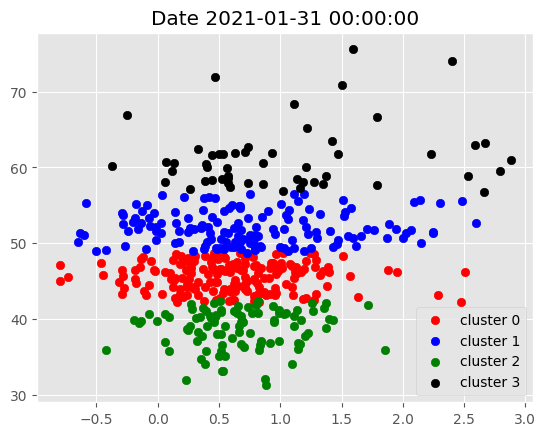

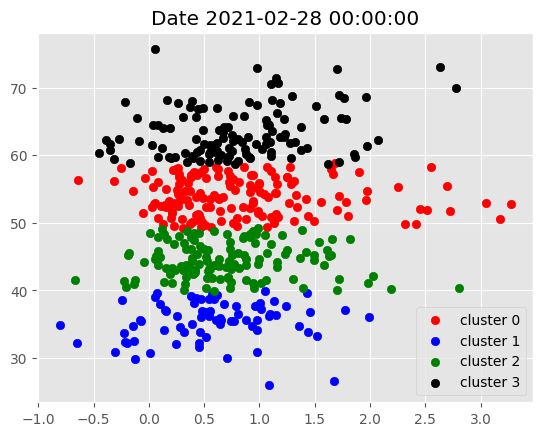

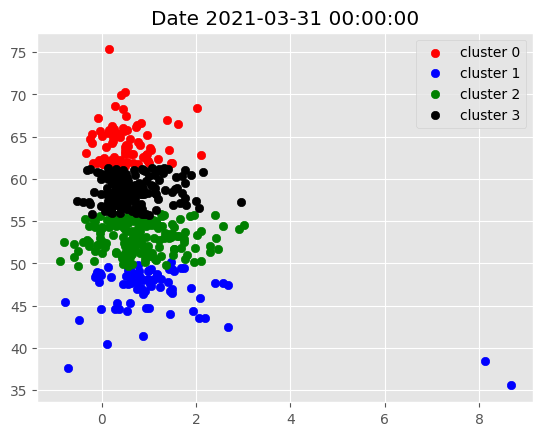

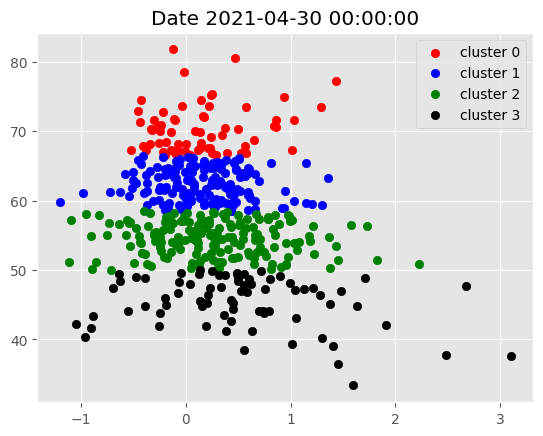

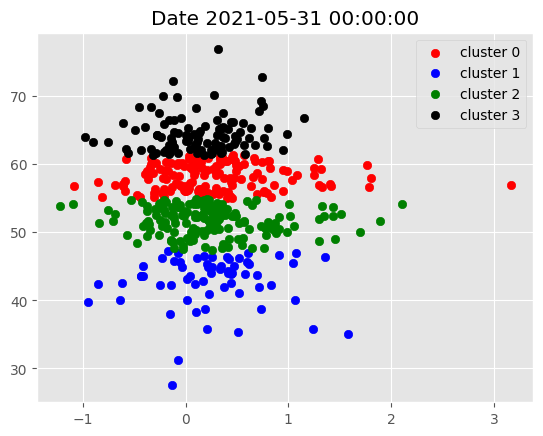

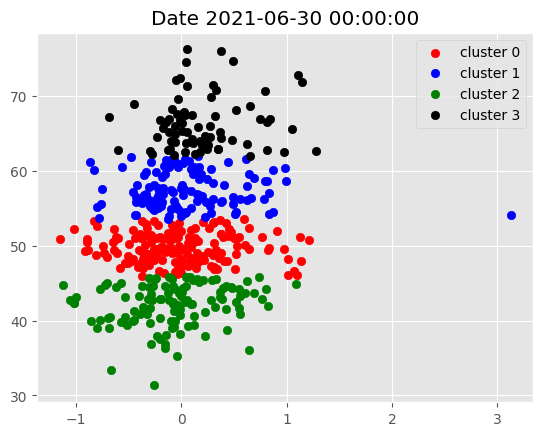

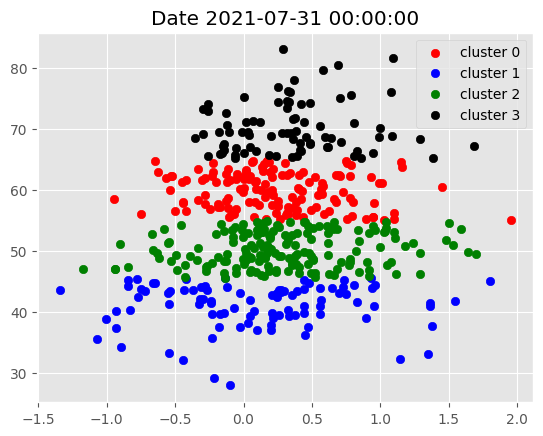

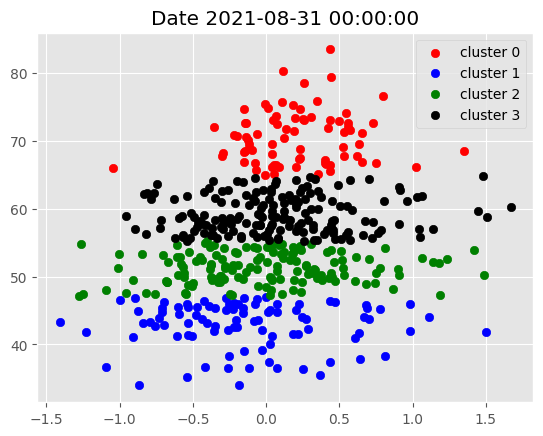

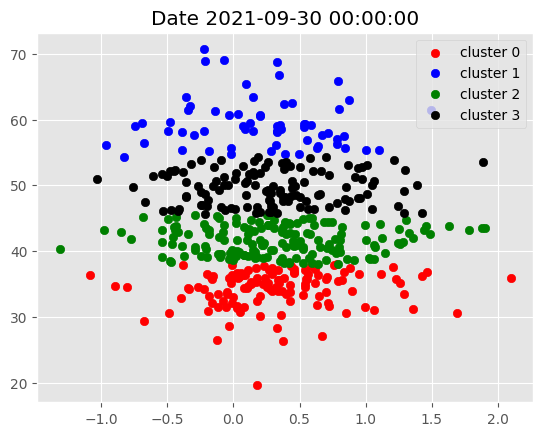

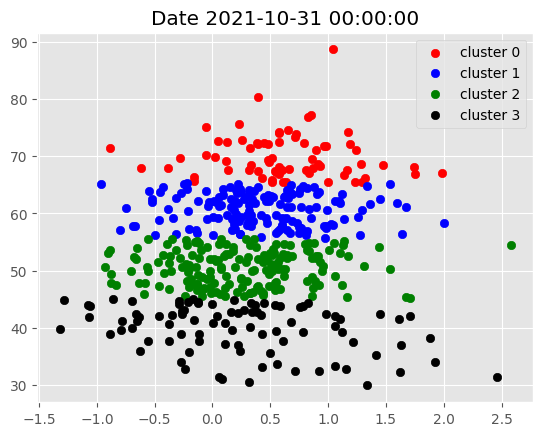

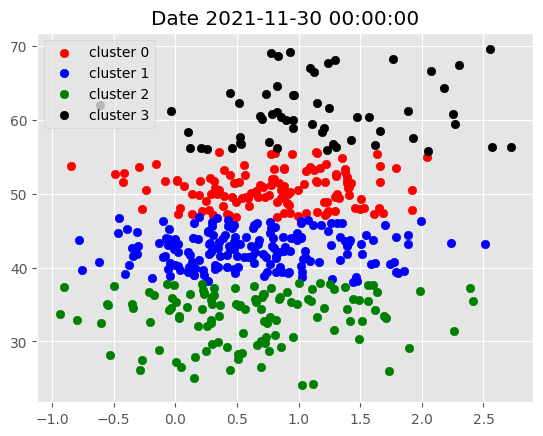

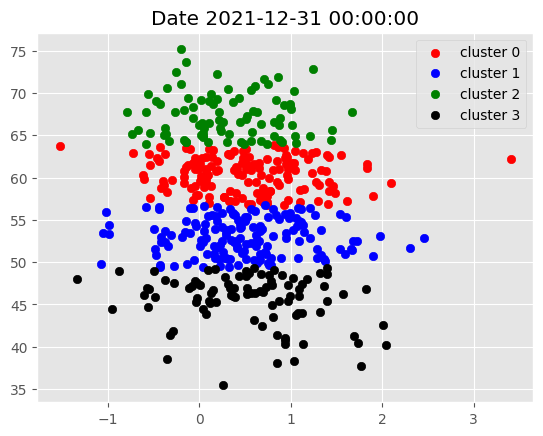

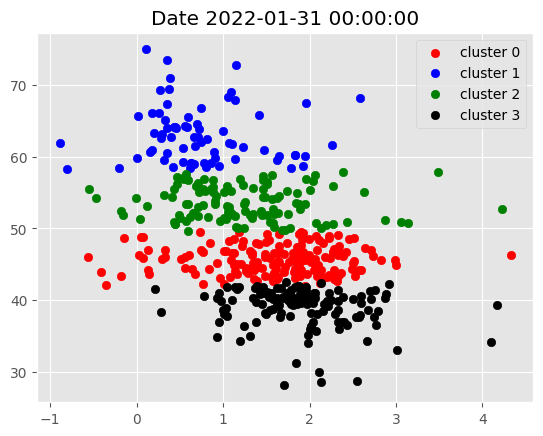

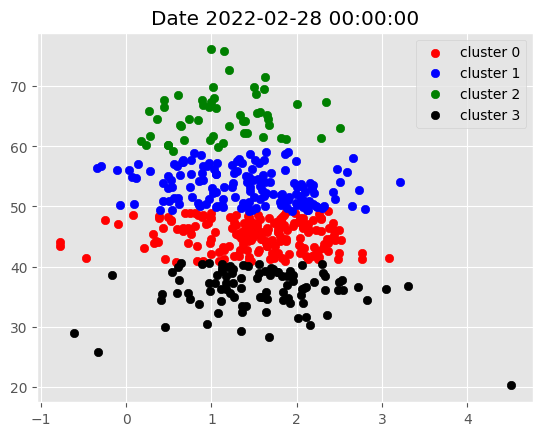

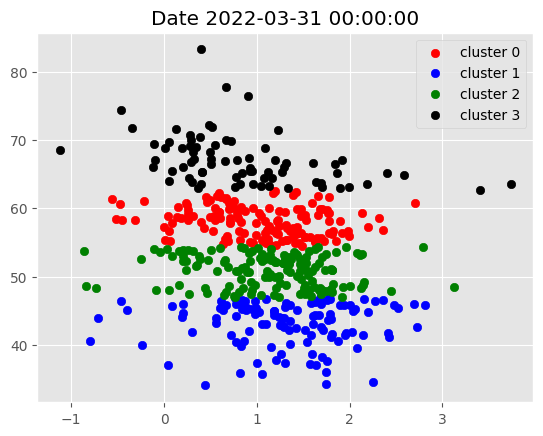

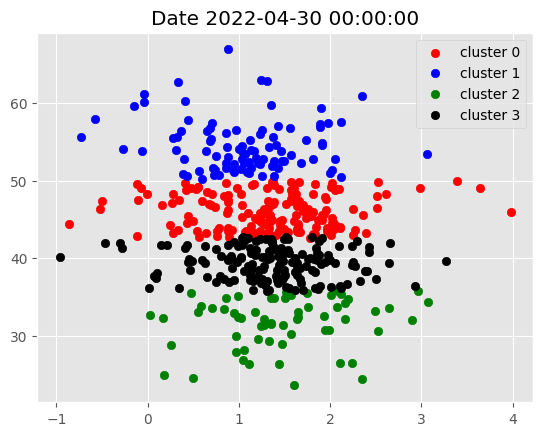

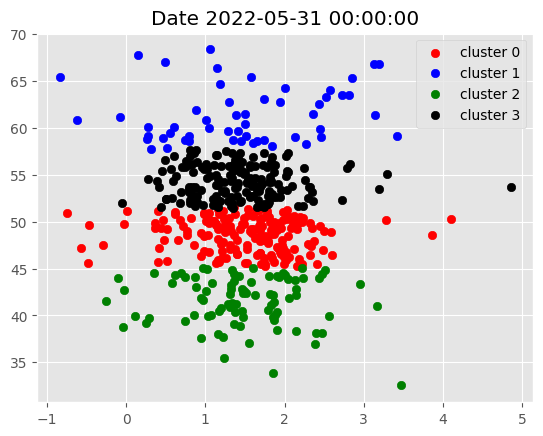

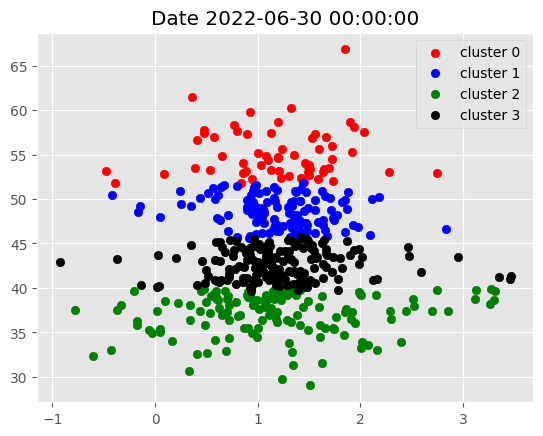

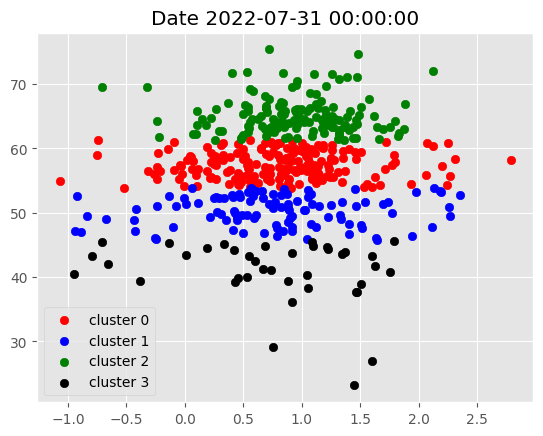

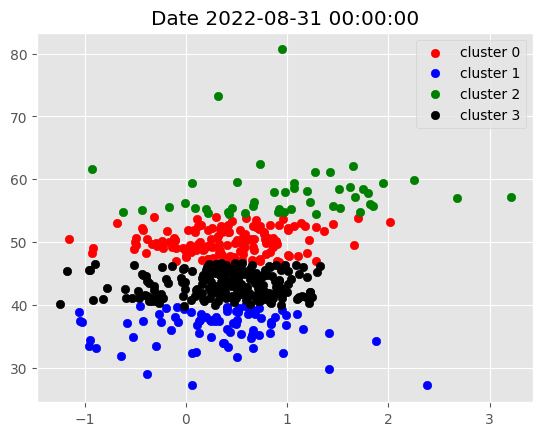

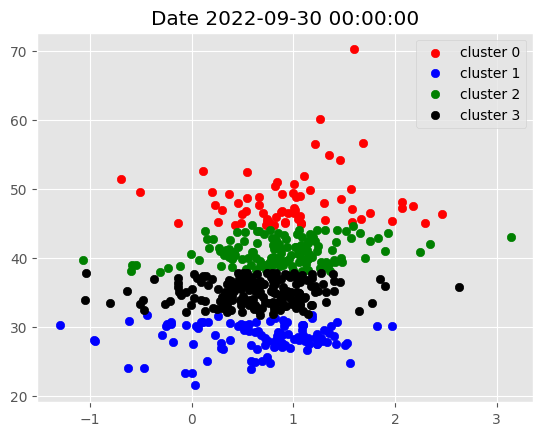

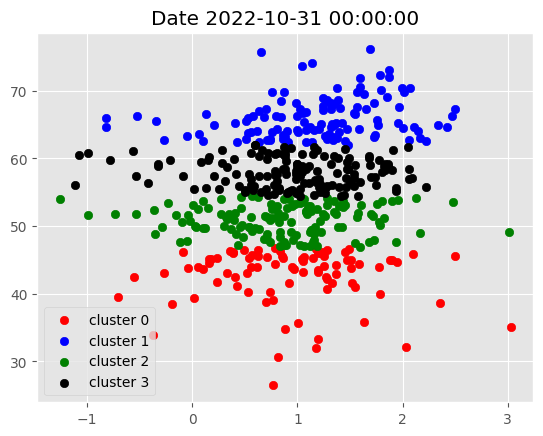

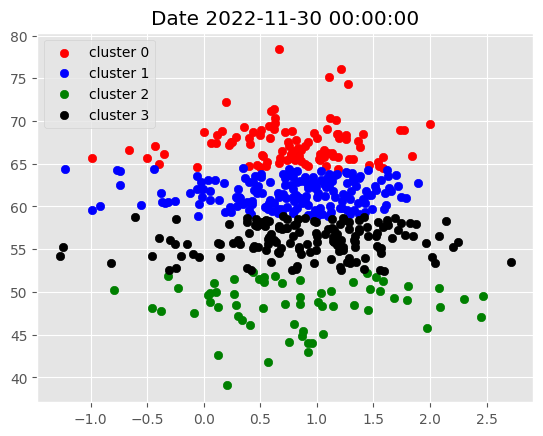

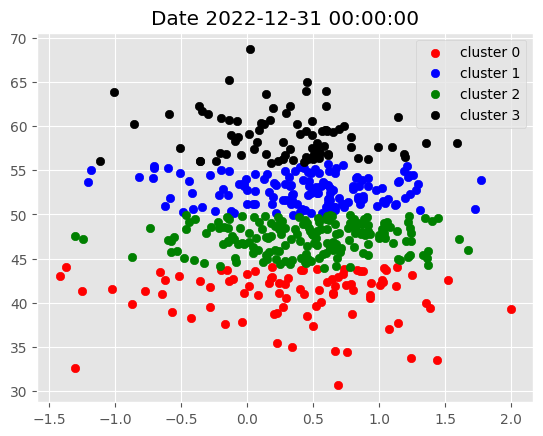

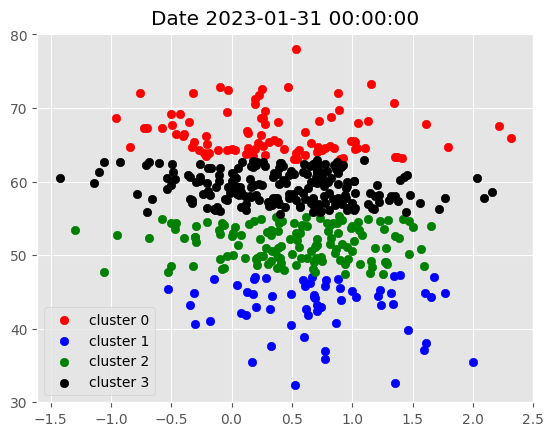

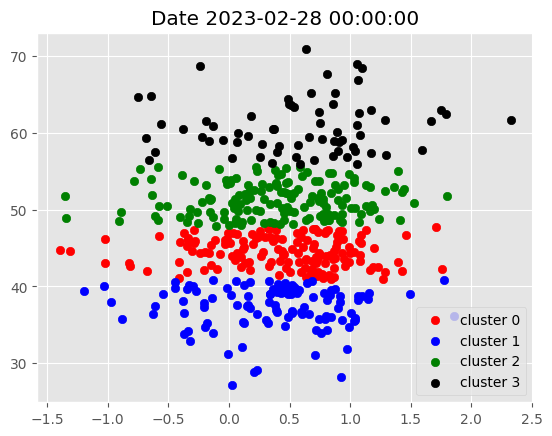

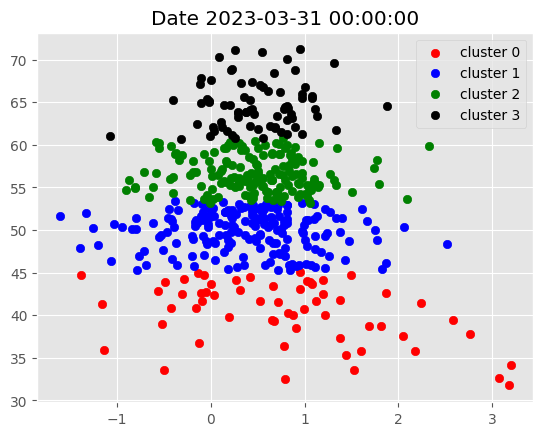

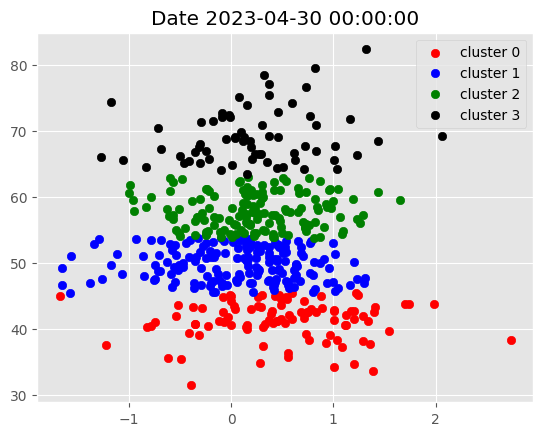

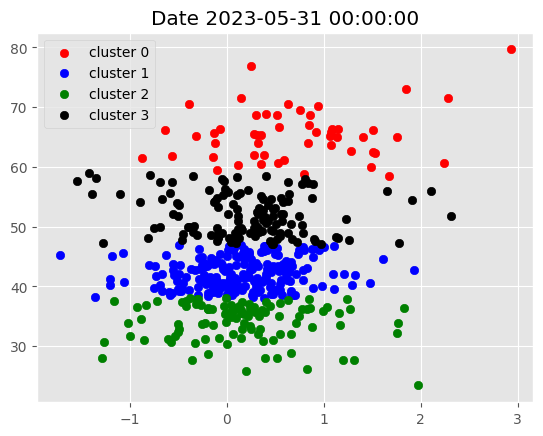

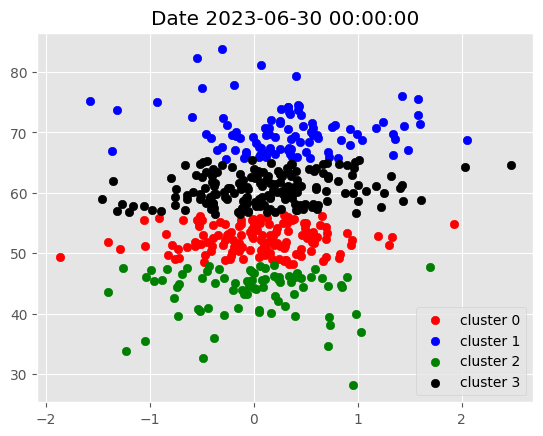

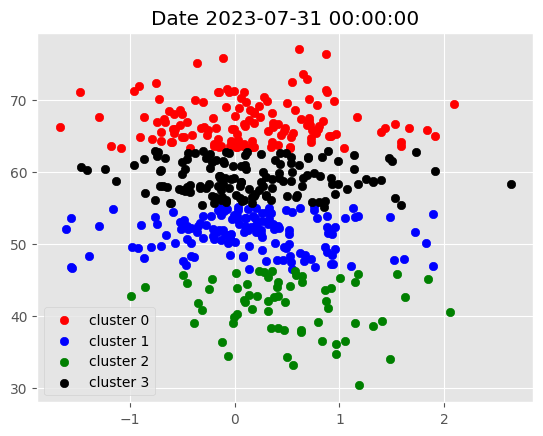

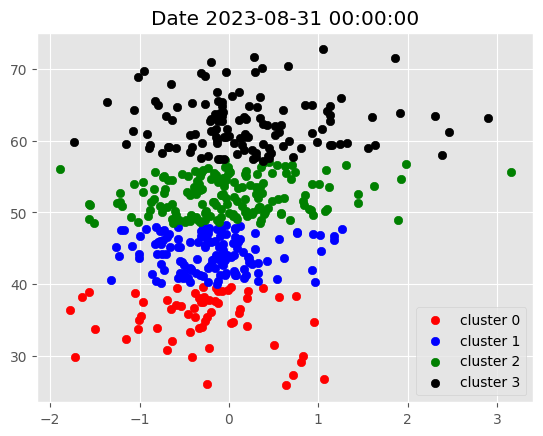

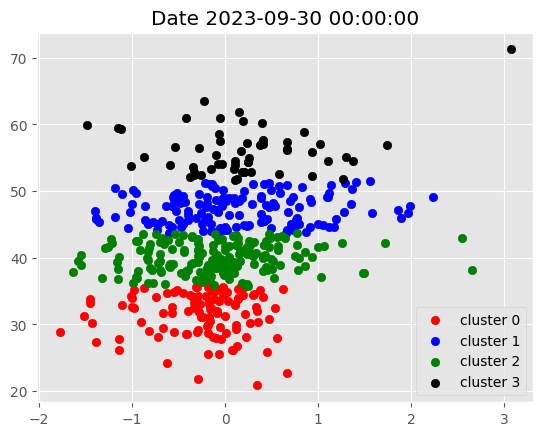

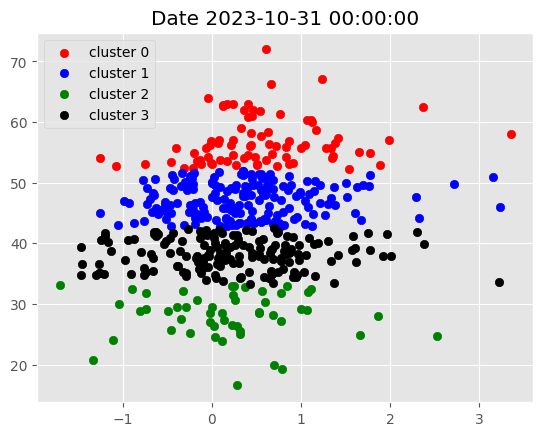

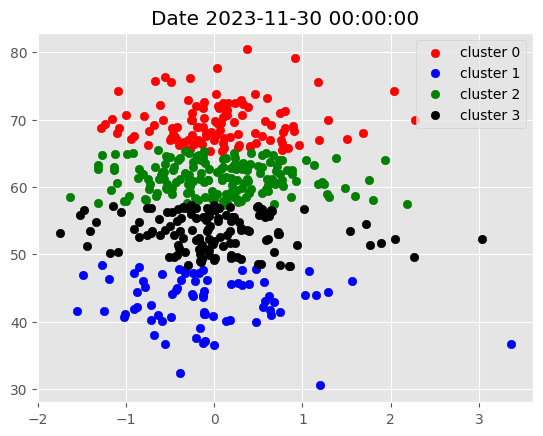

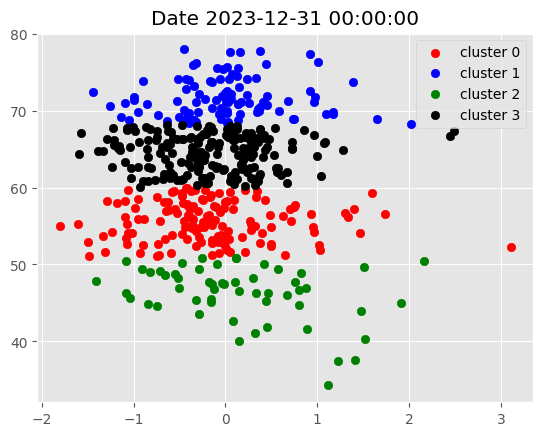

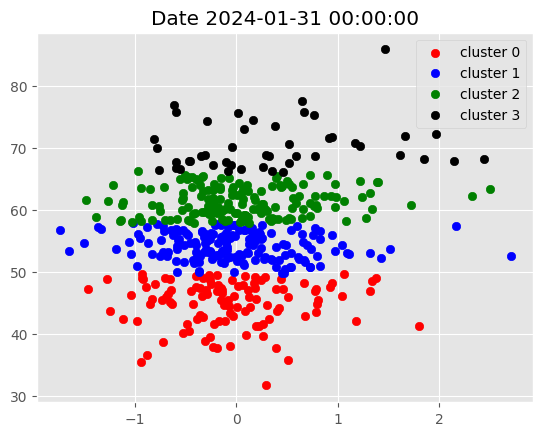

In [192]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    g=data.xs(i, level=0)
    
    plt.title(f'Date {i}')

    plot_clusters(g)

# feeding initial centroids instead of random. 

In [194]:
# Applying predefined Centroids 
target_rsi_values = [30,45,55,70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:,1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [195]:
data = data.drop('cluster', axis=1)
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2021-01-31 A              -0.000099  49.280090  4.756505  4.811188  4.865872   
           AAL             0.003462  58.346031  2.739660  2.823600  2.907540   
           AAPL            0.000365  51.602304  4.803911  4.879882  4.955853   
           ABBV           -0.006942  44.922905  4.507562  4.567931  4.628301   
           ABT             0.000595  75.566294  4.615893  4.679336  4.742778   
...                             ...        ...       ...       ...       ...   
2024-01-31 YUM             0.000038  54.121154  4.858321  4.871776  4.885230   
           ZBH             0.000179  66.542085  4.778453  4.801891  4.825329   
           ZBRA            0.001552  49.400029  5.512811  5.578735  5.644659   
           ZION            0.000493  53.847350  3.760448  3.801275  3.842101   
           ZTS             0.000076  63.793826  5.267507  5.285011  5.302516   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2021-01-31 A       0.483021  0.360074   0.015841   0.014721   0.056432   
           AAL     0.446932  0.524545   0.088776   0.102336   0.149556   
           AAPL    1.409944  1.132452  -0.005501   0.052826   0.066860   
           ABBV    0.329520  0.051805  -0.032398  -0.004319   0.068038   
           ABT     1.596692  1.920746   0.133326   0.070806   0.056887   
...                     ...       ...        ...        ...        ...   
2024-01-31 YUM    -0.095371  0.116287  -0.011710   0.014157   0.023917   
           ZBH    -0.761423  0.750466   0.011257   0.029675   0.057041   
           ZBRA    0.082017  0.297738  -0.089489   0.024779   0.059200   
           ZION    0.246704  1.034019  -0.040118   0.087138   0.113767   
           ZTS     0.436948  1.278101   0.007955   0.061157   0.080983   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2021-01-31 A        0.038137   0.051863    0.032471  1.080081  0.450340   
           AAL      0.075089   0.040513   -0.036247  1.326693  1.692492   
           AAPL     0.037371   0.068004    0.046237  1.187965 -0.281918   
           ABBV     0.017127   0.029058    0.024210  0.432938 -0.145724   
           ABT      0.036098   0.034519    0.030874  0.688257  0.036277   
...                      ...        ...         ...       ...       ...   
2024-01-31 YUM     -0.009066  -0.007848    0.000668  0.711094  0.336370   
           ZBH     -0.018399  -0.012352   -0.002196  0.762164 -0.110840   
           ZBRA    -0.034884  -0.016106   -0.019751  1.328741  0.923336   
           ZION     0.020164   0.051754   -0.015230  0.582799  1.069901   
           ZTS      0.009793   0.014364    0.016029  0.647528  0.789413   

                        HML       RMW       CMA  
date       ticker                                
2021-01-31 A      -0.050398  0.549892  0.231566  
           AAL     0.396383 -0.360837  0.457422  
           AAPL   -0.308759  0.198334 -0.058113  
           ABBV   -0.395788  0.477701  0.987454  
           ABT    -0.319198  0.568890  0.641464  
...                     ...       ...       ...  
2024-01-31 YUM    -0.148189  1.171335  0.304004  
           ZBH    -0.246413 -0.537307  0.970252  
           ZBRA   -0.214410  0.971899 -0.557378  
           ZION    1.884755 -0.347983 -1.534922  
           ZTS    -0.440433  1.179861 -0.195751  

[17956 rows x 18 columns]

In [197]:
# First drop the existing cluster column to be able to rerun the Kmean cluster 

from sklearn.cluster import KMeans

def get_clusters2(df):
    df['cluster']=KMeans(n_clusters=4, random_state=0, init =initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters2)

In [198]:
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2021-01-31 A              -0.000099  49.280090  4.756505  4.811188  4.865872   
           AAL             0.003462  58.346031  2.739660  2.823600  2.907540   
           AAPL            0.000365  51.602304  4.803911  4.879882  4.955853   
           ABBV           -0.006942  44.922905  4.507562  4.567931  4.628301   
           ABT             0.000595  75.566294  4.615893  4.679336  4.742778   
...                             ...        ...       ...       ...       ...   
2024-01-31 YUM             0.000038  54.121154  4.858321  4.871776  4.885230   
           ZBH             0.000179  66.542085  4.778453  4.801891  4.825329   
           ZBRA            0.001552  49.400029  5.512811  5.578735  5.644659   
           ZION            0.000493  53.847350  3.760448  3.801275  3.842101   
           ZTS             0.000076  63.793826  5.267507  5.285011  5.302516   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2021-01-31 A       0.483021  0.360074   0.015841   0.014721   0.056432   
           AAL     0.446932  0.524545   0.088776   0.102336   0.149556   
           AAPL    1.409944  1.132452  -0.005501   0.052826   0.066860   
           ABBV    0.329520  0.051805  -0.032398  -0.004319   0.068038   
           ABT     1.596692  1.920746   0.133326   0.070806   0.056887   
...                     ...       ...        ...        ...        ...   
2024-01-31 YUM    -0.095371  0.116287  -0.011710   0.014157   0.023917   
           ZBH    -0.761423  0.750466   0.011257   0.029675   0.057041   
           ZBRA    0.082017  0.297738  -0.089489   0.024779   0.059200   
           ZION    0.246704  1.034019  -0.040118   0.087138   0.113767   
           ZTS     0.436948  1.278101   0.007955   0.061157   0.080983   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2021-01-31 A        0.038137   0.051863    0.032471  1.080081  0.450340   
           AAL      0.075089   0.040513   -0.036247  1.326693  1.692492   
           AAPL     0.037371   0.068004    0.046237  1.187965 -0.281918   
           ABBV     0.017127   0.029058    0.024210  0.432938 -0.145724   
           ABT      0.036098   0.034519    0.030874  0.688257  0.036277   
...                      ...        ...         ...       ...       ...   
2024-01-31 YUM     -0.009066  -0.007848    0.000668  0.711094  0.336370   
           ZBH     -0.018399  -0.012352   -0.002196  0.762164 -0.110840   
           ZBRA    -0.034884  -0.016106   -0.019751  1.328741  0.923336   
           ZION     0.020164   0.051754   -0.015230  0.582799  1.069901   
           ZTS      0.009793   0.014364    0.016029  0.647528  0.789413   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2021-01-31 A      -0.050398  0.549892  0.231566        2  
           AAL     0.396383 -0.360837  0.457422        3  
           AAPL   -0.308759  0.198334 -0.058113        2  
           ABBV   -0.395788  0.477701  0.987454        1  
           ABT    -0.319198  0.568890  0.641464        3  
...                     ...       ...       ...      ...  
2024-01-31 YUM    -0.148189  1.171335  0.304004        1  
           ZBH    -0.246413 -0.537307  0.970252        3  
           ZBRA   -0.214410  0.971899 -0.557378        1  
           ZION    1.884755 -0.347983 -1.534922        1  
           ZTS    -0.440433  1.179861 -0.195751        3  

[17956 rows x 19 columns]

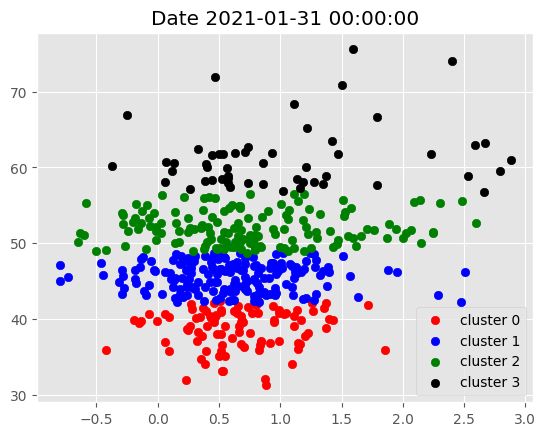

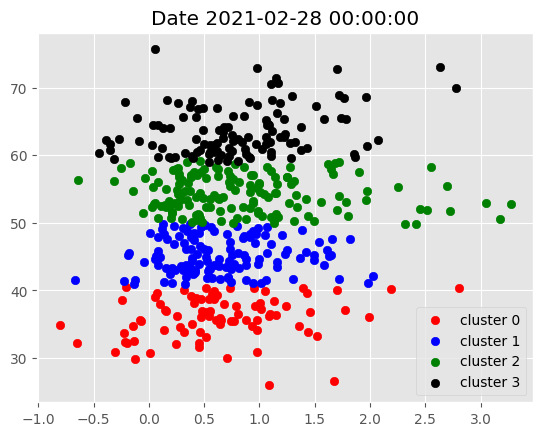

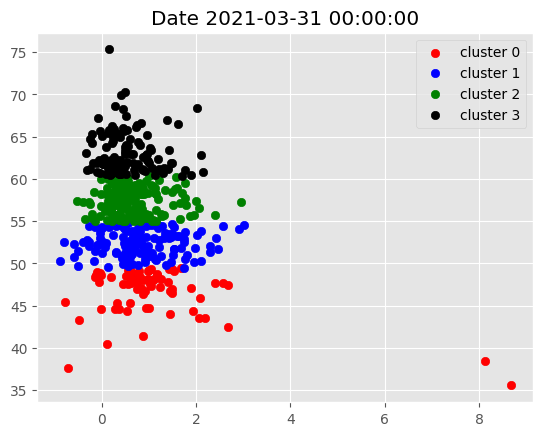

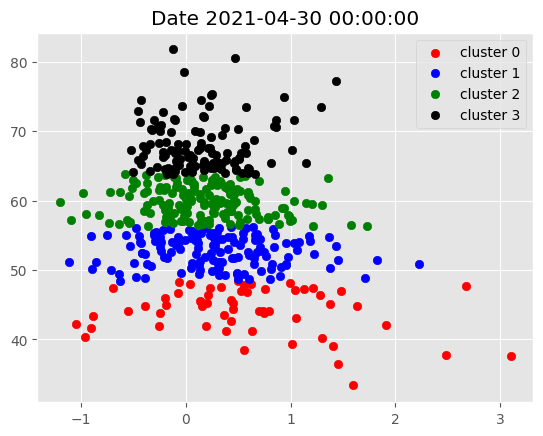

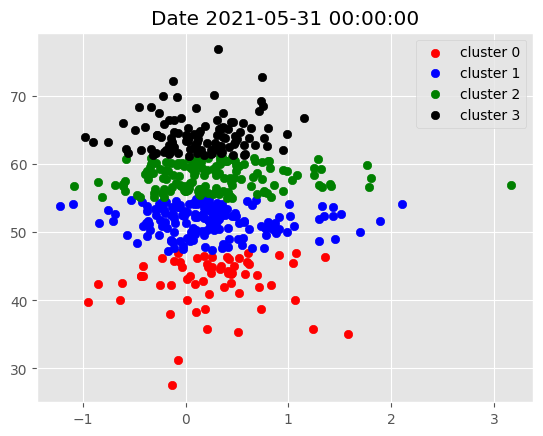

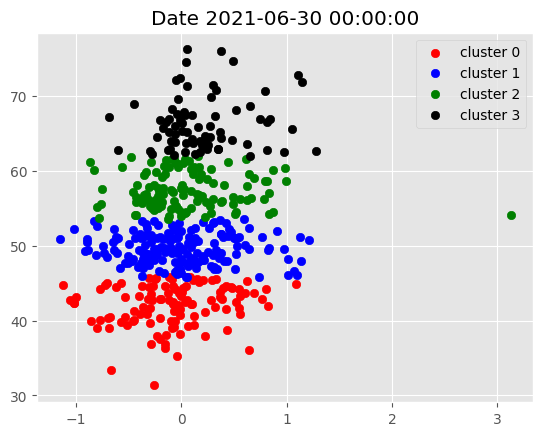

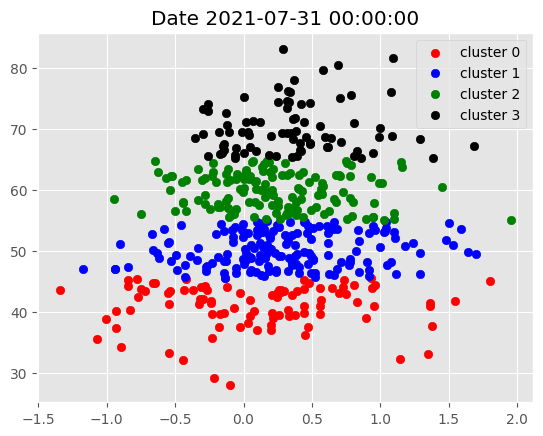

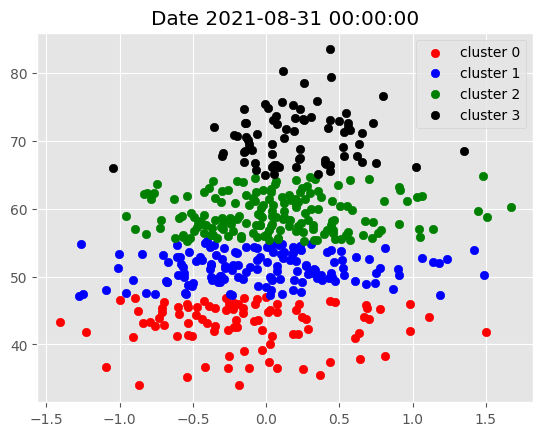

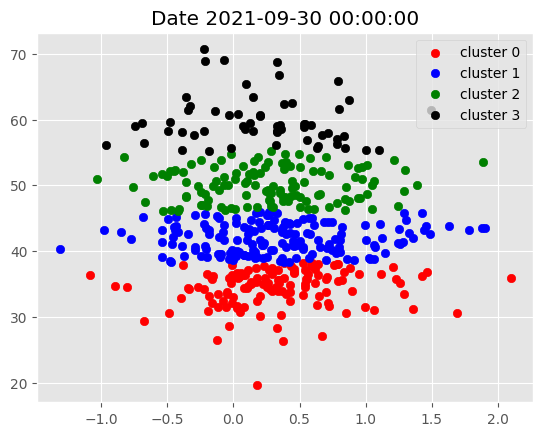

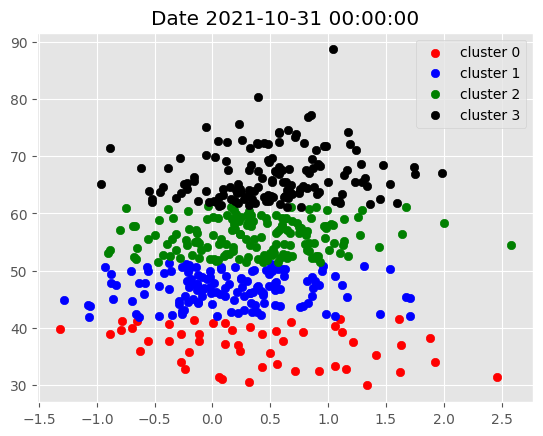

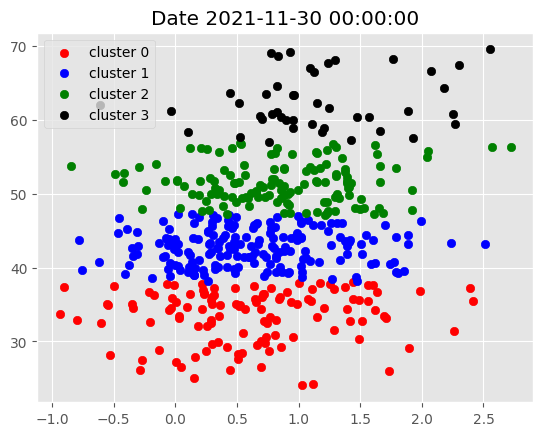

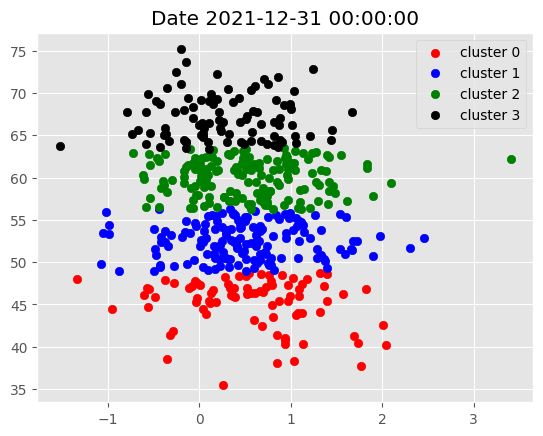

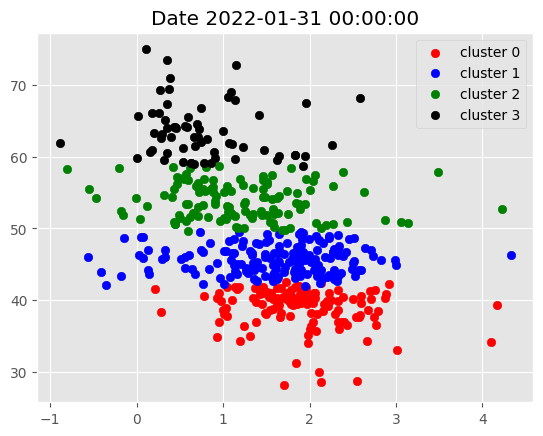

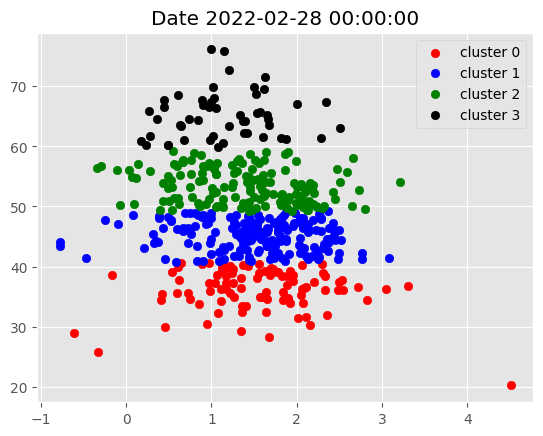

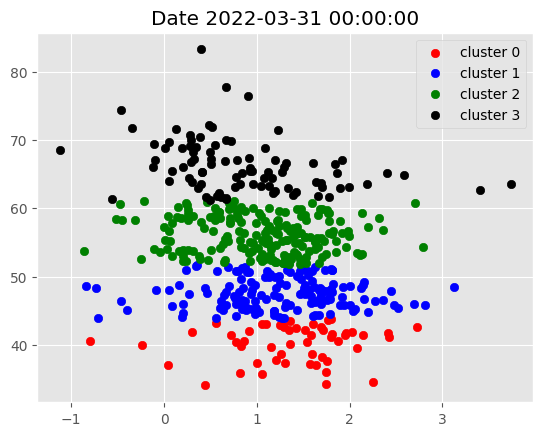

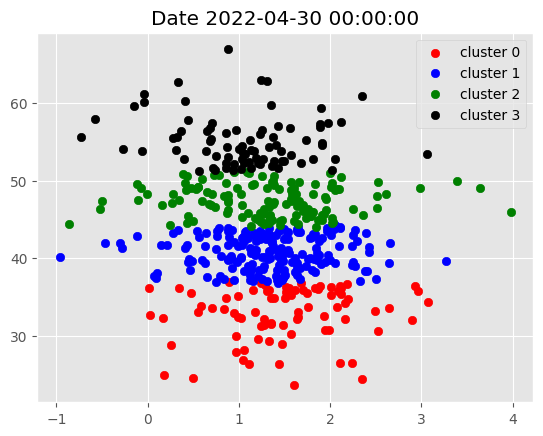

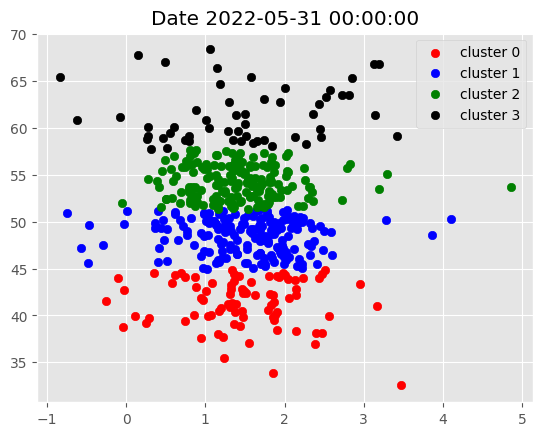

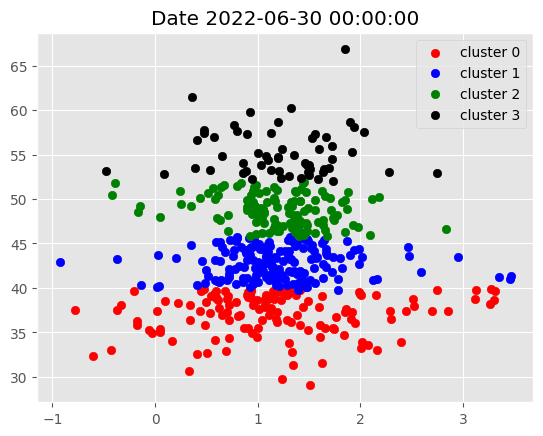

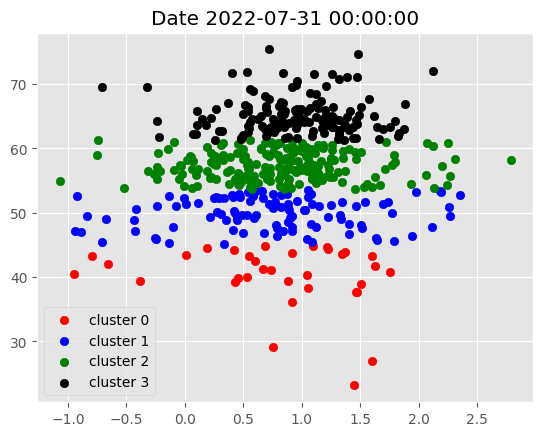

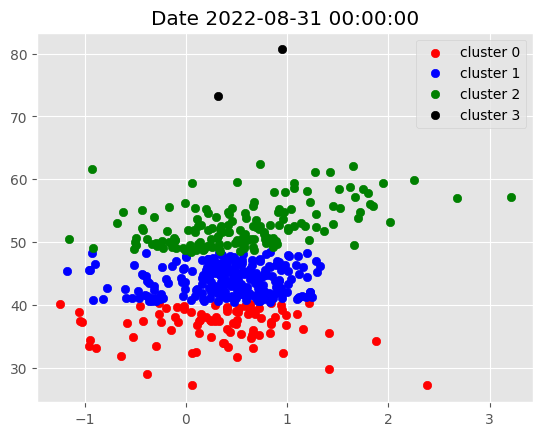

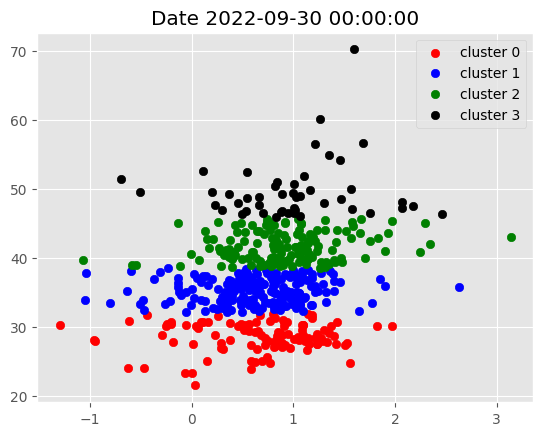

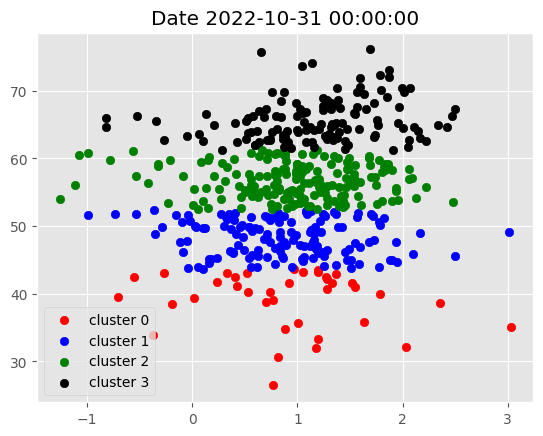

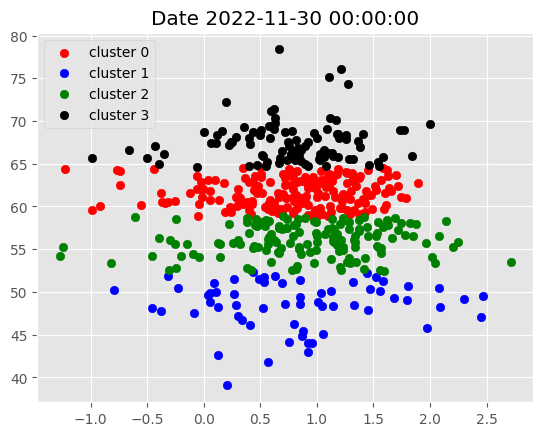

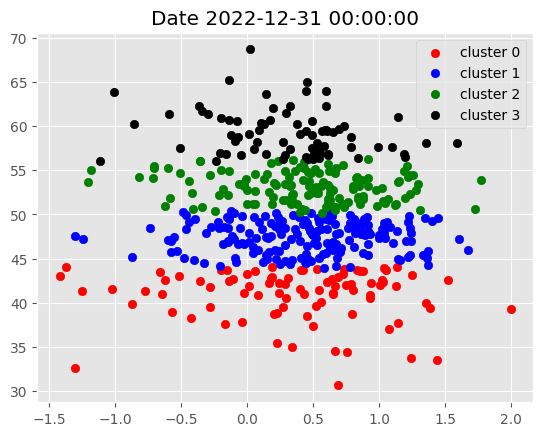

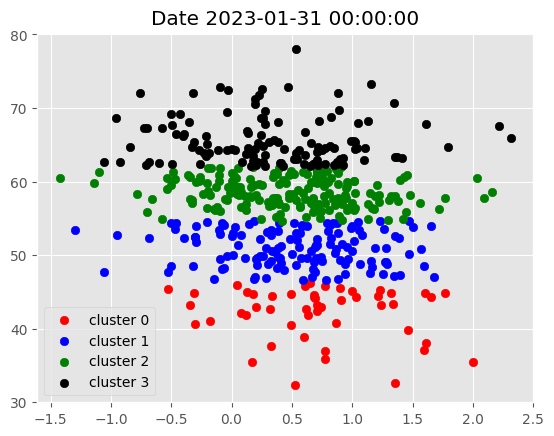

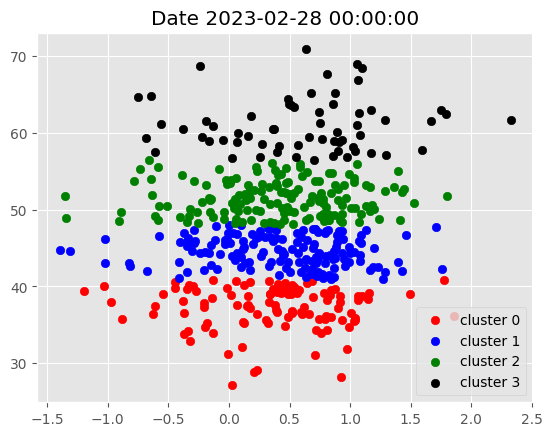

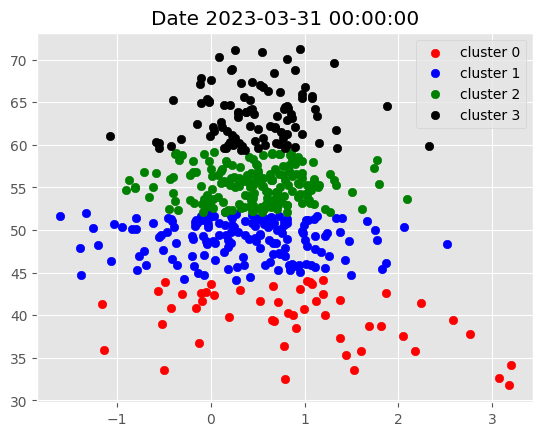

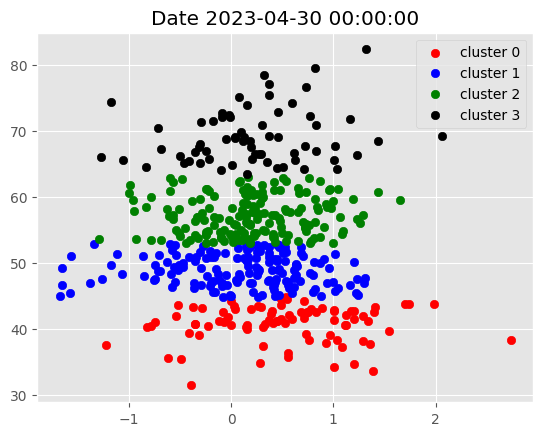

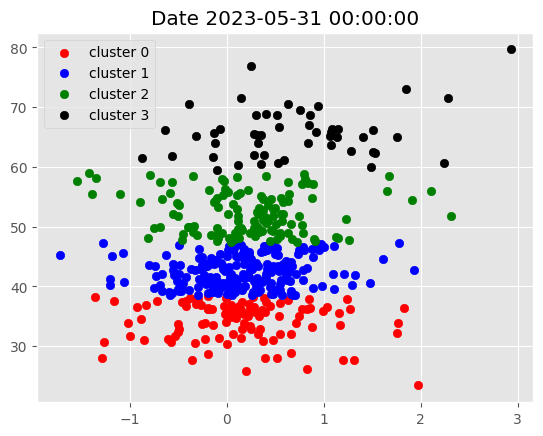

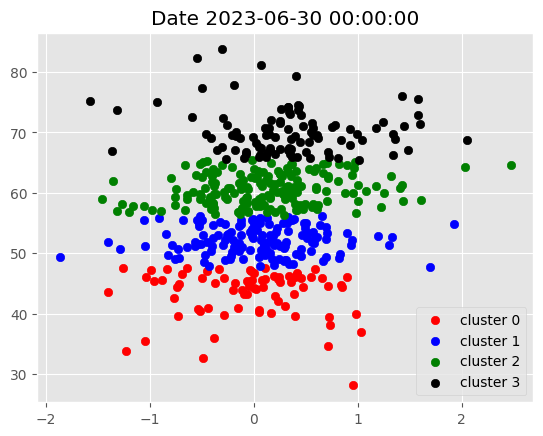

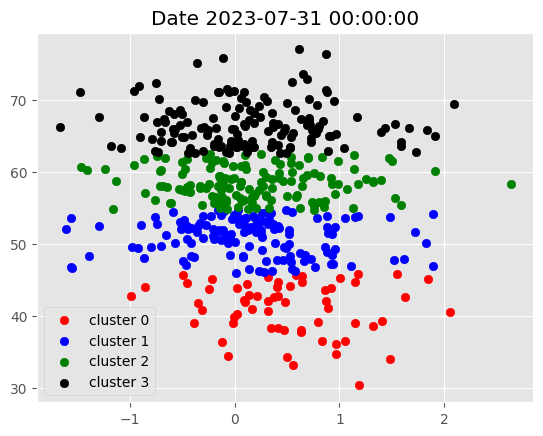

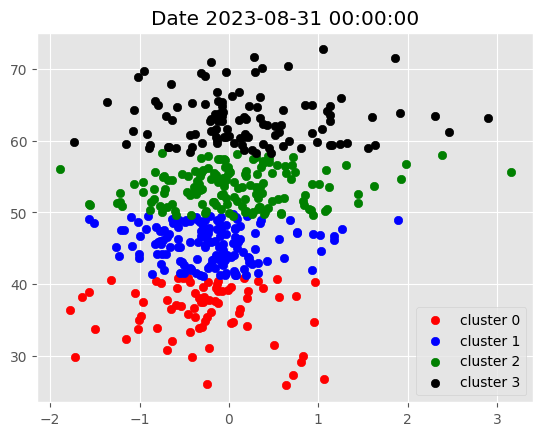

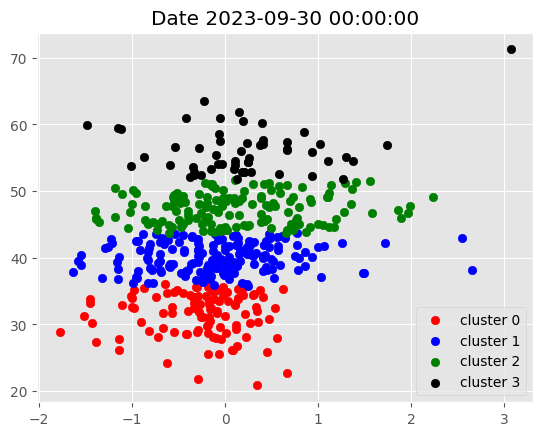

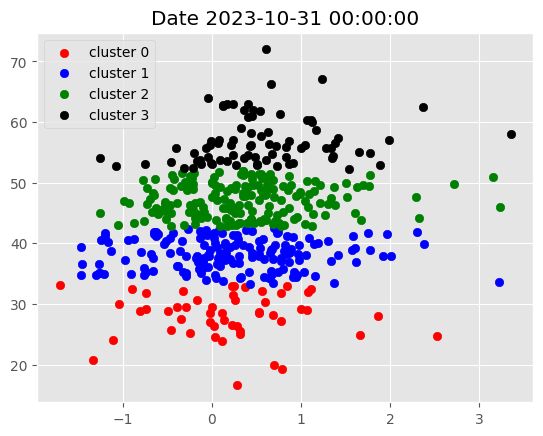

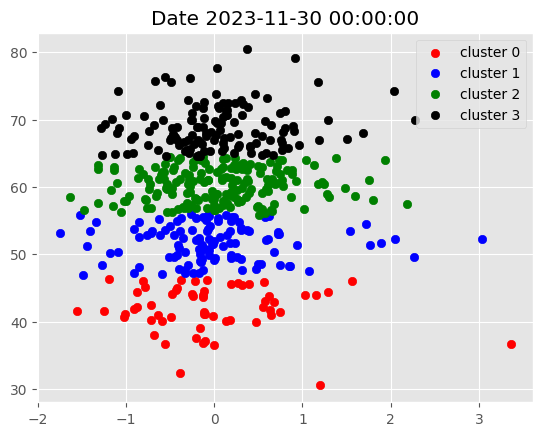

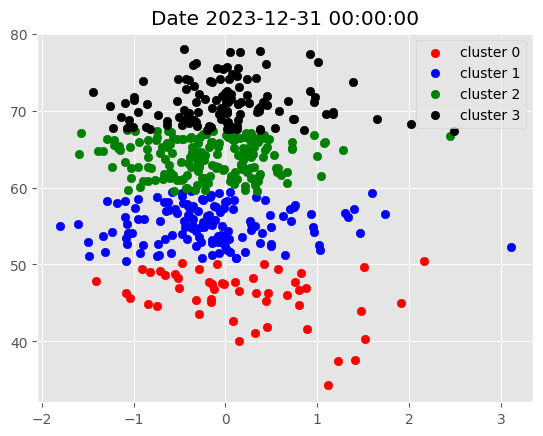

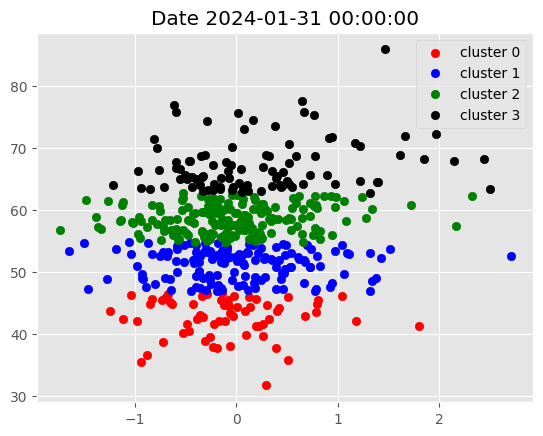

In [199]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    g=data.xs(i, level=0)
    
    plt.title(f'Date {i}')

    plot_clusters(g)

# For each month select assets based on cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization
1. First we will filter only stocks corresponding to the cluster we choose based on our hypothesis
2. Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3

In [200]:
# Filter cluster 3 stocks as they are above RSI 70 
filtered_df = data[data['cluster']==3].copy()
filtered_df 

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2021-01-31 AAL             0.003462  58.346031  2.739660  2.823600  2.907540   
           ABT             0.000595  75.566294  4.615893  4.679336  4.742778   
           ANET            0.000436  60.186578  4.276811  4.346341  4.415870   
           AVGO           -0.002336  58.123123  5.969750  6.025470  6.081190   
           AXON            0.001292  66.620805  4.707735  4.989087  5.270439   
...                             ...        ...       ...       ...       ...   
2024-01-31 WAB             0.000067  69.985634  4.813923  4.841048  4.868173   
           WM              0.000079  66.907508  5.170699  5.186970  5.203241   
           XRAY            0.000111  63.449288  3.543590  3.593460  3.643330   
           ZBH             0.000179  66.542085  4.778453  4.801891  4.825329   
           ZTS             0.000076  63.793826  5.267507  5.285011  5.302516   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2021-01-31 AAL     0.446932  0.524545   0.088776   0.102336   0.149556   
           ABT     1.596692  1.920746   0.133326   0.070806   0.056887   
           ANET   -0.375587  0.362558   0.058471   0.065911   0.137620   
           AVGO    0.059574  0.545717   0.028891   0.063662   0.091248   
           AXON    1.793176  3.238212   0.339754   0.142834   0.184014   
...                     ...       ...        ...        ...        ...   
2024-01-31 WAB    -0.788408  1.186771   0.008826   0.048007   0.065404   
           WM      0.264427  0.967851   0.012842   0.029991   0.034916   
           XRAY   -0.850129  1.221133   0.027255   0.075192   0.064715   
           ZBH    -0.761423  0.750466   0.011257   0.029675   0.057041   
           ZTS     0.436948  1.278101   0.007955   0.061157   0.080983   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2021-01-31 AAL      0.075089   0.040513   -0.036247  1.326693  1.692492   
           ABT      0.036098   0.034519    0.030874  0.688257  0.036277   
           ANET     0.028545   0.038296    0.027023  1.302495 -0.521298   
           AVGO     0.063573   0.061101    0.036845  1.248752 -0.011826   
           AXON     0.120087   0.094705    0.065338  1.457263  0.466715   
...                      ...        ...         ...       ...       ...   
2024-01-31 WAB      0.013554   0.031073    0.018169  1.131519  0.384198   
           WM       0.018630   0.011328    0.014831  0.522597 -0.461871   
           XRAY    -0.019666  -0.013843    0.000663  1.001939  0.783839   
           ZBH     -0.018399  -0.012352   -0.002196  0.762164 -0.110840   
           ZTS      0.009793   0.014364    0.016029  0.647528  0.789413   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2021-01-31 AAL     0.396383 -0.360837  0.457422        3  
           ABT    -0.319198  0.568890  0.641464        3  
           ANET   -1.030566  0.885441  0.287339        3  
           AVGO   -0.556554  0.407368  0.652908        3  
           AXON   -0.844026 -0.287136  0.658961        3  
...                     ...       ...       ...      ...  
2024-01-31 WAB     0.392387  0.182613  0.079025        3  
           WM     -0.533599  0.198983  0.352308        3  
           XRAY   -0.067667  0.162880  0.546416        3  
           ZBH    -0.246413 -0.537307  0.970252        3  
           ZTS    -0.440433  1.179861 -0.195751        3  

[3206 rows x 19 columns]

In [201]:
# create a list of stocks in the form of a dictionary that we need to invest next month based on RSI 70
filtered_df = filtered_df.reset_index(level=1)
filtered_df

ticker  garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date                                                                           
2021-01-31    AAL          0.003462  58.346031  2.739660  2.823600  2.907540   
2021-01-31    ABT          0.000595  75.566294  4.615893  4.679336  4.742778   
2021-01-31   ANET          0.000436  60.186578  4.276811  4.346341  4.415870   
2021-01-31   AVGO         -0.002336  58.123123  5.969750  6.025470  6.081190   
2021-01-31   AXON          0.001292  66.620805  4.707735  4.989087  5.270439   
...           ...               ...        ...       ...       ...       ...   
2024-01-31    WAB          0.000067  69.985634  4.813923  4.841048  4.868173   
2024-01-31     WM          0.000079  66.907508  5.170699  5.186970  5.203241   
2024-01-31   XRAY          0.000111  63.449288  3.543590  3.593460  3.643330   
2024-01-31    ZBH          0.000179  66.542085  4.778453  4.801891  4.825329   
2024-01-31    ZTS          0.000076  63.793826  5.267507  5.285011  5.302516   

                 atr      macd  return_1m  return_2m  return_3m  return_6m  \
date                                                                         
2021-01-31  0.446932  0.524545   0.088776   0.102336   0.149556   0.075089   
2021-01-31  1.596692  1.920746   0.133326   0.070806   0.056887   0.036098   
2021-01-31 -0.375587  0.362558   0.058471   0.065911   0.137620   0.028545   
2021-01-31  0.059574  0.545717   0.028891   0.063662   0.091248   0.063573   
2021-01-31  1.793176  3.238212   0.339754   0.142834   0.184014   0.120087   
...              ...       ...        ...        ...        ...        ...   
2024-01-31 -0.788408  1.186771   0.008826   0.048007   0.065404   0.013554   
2024-01-31  0.264427  0.967851   0.012842   0.029991   0.034916   0.018630   
2024-01-31 -0.850129  1.221133   0.027255   0.075192   0.064715  -0.019666   
2024-01-31 -0.761423  0.750466   0.011257   0.029675   0.057041  -0.018399   
2024-01-31  0.436948  1.278101   0.007955   0.061157   0.080983   0.009793   

            return_9m  return_12m    Mkt-RF       SMB       HML       RMW  \
date                                                                        
2021-01-31   0.040513   -0.036247  1.326693  1.692492  0.396383 -0.360837   
2021-01-31   0.034519    0.030874  0.688257  0.036277 -0.319198  0.568890   
2021-01-31   0.038296    0.027023  1.302495 -0.521298 -1.030566  0.885441   
2021-01-31   0.061101    0.036845  1.248752 -0.011826 -0.556554  0.407368   
2021-01-31   0.094705    0.065338  1.457263  0.466715 -0.844026 -0.287136   
...               ...         ...       ...       ...       ...       ...   
2024-01-31   0.031073    0.018169  1.131519  0.384198  0.392387  0.182613   
2024-01-31   0.011328    0.014831  0.522597 -0.461871 -0.533599  0.198983   
2024-01-31  -0.013843    0.000663  1.001939  0.783839 -0.067667  0.162880   
2024-01-31  -0.012352   -0.002196  0.762164 -0.110840 -0.246413 -0.537307   
2024-01-31   0.014364    0.016029  0.647528  0.789413 -0.440433  1.179861   

                 CMA  cluster  
date                           
2021-01-31  0.457422        3  
2021-01-31  0.641464        3  
2021-01-31  0.287339        3  
2021-01-31  0.652908        3  
2021-01-31  0.658961        3  
...              ...      ...  
2024-01-31  0.079025        3  
2024-01-31  0.352308        3  
2024-01-31  0.546416        3  
2024-01-31  0.970252        3  
2024-01-31 -0.195751        3  

[3206 rows x 20 columns]

In [202]:
# Move by 1 day future forward so it is begining of next month

filtered_df.index=filtered_df.index+pd.DateOffset(1)
filtered_df

ticker  garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date                                                                           
2021-02-01    AAL          0.003462  58.346031  2.739660  2.823600  2.907540   
2021-02-01    ABT          0.000595  75.566294  4.615893  4.679336  4.742778   
2021-02-01   ANET          0.000436  60.186578  4.276811  4.346341  4.415870   
2021-02-01   AVGO         -0.002336  58.123123  5.969750  6.025470  6.081190   
2021-02-01   AXON          0.001292  66.620805  4.707735  4.989087  5.270439   
...           ...               ...        ...       ...       ...       ...   
2024-02-01    WAB          0.000067  69.985634  4.813923  4.841048  4.868173   
2024-02-01     WM          0.000079  66.907508  5.170699  5.186970  5.203241   
2024-02-01   XRAY          0.000111  63.449288  3.543590  3.593460  3.643330   
2024-02-01    ZBH          0.000179  66.542085  4.778453  4.801891  4.825329   
2024-02-01    ZTS          0.000076  63.793826  5.267507  5.285011  5.302516   

                 atr      macd  return_1m  return_2m  return_3m  return_6m  \
date                                                                         
2021-02-01  0.446932  0.524545   0.088776   0.102336   0.149556   0.075089   
2021-02-01  1.596692  1.920746   0.133326   0.070806   0.056887   0.036098   
2021-02-01 -0.375587  0.362558   0.058471   0.065911   0.137620   0.028545   
2021-02-01  0.059574  0.545717   0.028891   0.063662   0.091248   0.063573   
2021-02-01  1.793176  3.238212   0.339754   0.142834   0.184014   0.120087   
...              ...       ...        ...        ...        ...        ...   
2024-02-01 -0.788408  1.186771   0.008826   0.048007   0.065404   0.013554   
2024-02-01  0.264427  0.967851   0.012842   0.029991   0.034916   0.018630   
2024-02-01 -0.850129  1.221133   0.027255   0.075192   0.064715  -0.019666   
2024-02-01 -0.761423  0.750466   0.011257   0.029675   0.057041  -0.018399   
2024-02-01  0.436948  1.278101   0.007955   0.061157   0.080983   0.009793   

            return_9m  return_12m    Mkt-RF       SMB       HML       RMW  \
date                                                                        
2021-02-01   0.040513   -0.036247  1.326693  1.692492  0.396383 -0.360837   
2021-02-01   0.034519    0.030874  0.688257  0.036277 -0.319198  0.568890   
2021-02-01   0.038296    0.027023  1.302495 -0.521298 -1.030566  0.885441   
2021-02-01   0.061101    0.036845  1.248752 -0.011826 -0.556554  0.407368   
2021-02-01   0.094705    0.065338  1.457263  0.466715 -0.844026 -0.287136   
...               ...         ...       ...       ...       ...       ...   
2024-02-01   0.031073    0.018169  1.131519  0.384198  0.392387  0.182613   
2024-02-01   0.011328    0.014831  0.522597 -0.461871 -0.533599  0.198983   
2024-02-01  -0.013843    0.000663  1.001939  0.783839 -0.067667  0.162880   
2024-02-01  -0.012352   -0.002196  0.762164 -0.110840 -0.246413 -0.537307   
2024-02-01   0.014364    0.016029  0.647528  0.789413 -0.440433  1.179861   

                 CMA  cluster  
date                           
2021-02-01  0.457422        3  
2021-02-01  0.641464        3  
2021-02-01  0.287339        3  
2021-02-01  0.652908        3  
2021-02-01  0.658961        3  
...              ...      ...  
2024-02-01  0.079025        3  
2024-02-01  0.352308        3  
2024-02-01  0.546416        3  
2024-02-01  0.970252        3  
2024-02-01 -0.195751        3  

[3206 rows x 20 columns]

In [203]:
# reset the index to a multi index like unstack and stack method 
filtered_df = filtered_df.reset_index().set_index(['date','ticker'])
filtered_df

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2021-02-01 AAL             0.003462  58.346031  2.739660  2.823600  2.907540   
           ABT             0.000595  75.566294  4.615893  4.679336  4.742778   
           ANET            0.000436  60.186578  4.276811  4.346341  4.415870   
           AVGO           -0.002336  58.123123  5.969750  6.025470  6.081190   
           AXON            0.001292  66.620805  4.707735  4.989087  5.270439   
...                             ...        ...       ...       ...       ...   
2024-02-01 WAB             0.000067  69.985634  4.813923  4.841048  4.868173   
           WM              0.000079  66.907508  5.170699  5.186970  5.203241   
           XRAY            0.000111  63.449288  3.543590  3.593460  3.643330   
           ZBH             0.000179  66.542085  4.778453  4.801891  4.825329   
           ZTS             0.000076  63.793826  5.267507  5.285011  5.302516   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2021-02-01 AAL     0.446932  0.524545   0.088776   0.102336   0.149556   
           ABT     1.596692  1.920746   0.133326   0.070806   0.056887   
           ANET   -0.375587  0.362558   0.058471   0.065911   0.137620   
           AVGO    0.059574  0.545717   0.028891   0.063662   0.091248   
           AXON    1.793176  3.238212   0.339754   0.142834   0.184014   
...                     ...       ...        ...        ...        ...   
2024-02-01 WAB    -0.788408  1.186771   0.008826   0.048007   0.065404   
           WM      0.264427  0.967851   0.012842   0.029991   0.034916   
           XRAY   -0.850129  1.221133   0.027255   0.075192   0.064715   
           ZBH    -0.761423  0.750466   0.011257   0.029675   0.057041   
           ZTS     0.436948  1.278101   0.007955   0.061157   0.080983   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2021-02-01 AAL      0.075089   0.040513   -0.036247  1.326693  1.692492   
           ABT      0.036098   0.034519    0.030874  0.688257  0.036277   
           ANET     0.028545   0.038296    0.027023  1.302495 -0.521298   
           AVGO     0.063573   0.061101    0.036845  1.248752 -0.011826   
           AXON     0.120087   0.094705    0.065338  1.457263  0.466715   
...                      ...        ...         ...       ...       ...   
2024-02-01 WAB      0.013554   0.031073    0.018169  1.131519  0.384198   
           WM       0.018630   0.011328    0.014831  0.522597 -0.461871   
           XRAY    -0.019666  -0.013843    0.000663  1.001939  0.783839   
           ZBH     -0.018399  -0.012352   -0.002196  0.762164 -0.110840   
           ZTS      0.009793   0.014364    0.016029  0.647528  0.789413   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2021-02-01 AAL     0.396383 -0.360837  0.457422        3  
           ABT    -0.319198  0.568890  0.641464        3  
           ANET   -1.030566  0.885441  0.287339        3  
           AVGO   -0.556554  0.407368  0.652908        3  
           AXON   -0.844026 -0.287136  0.658961        3  
...                     ...       ...       ...      ...  
2024-02-01 WAB     0.392387  0.182613  0.079025        3  
           WM     -0.533599  0.198983  0.352308        3  
           XRAY   -0.067667  0.162880  0.546416        3  
           ZBH    -0.246413 -0.537307  0.970252        3  
           ZTS    -0.440433  1.179861 -0.195751        3  

[3206 rows x 19 columns]

In [205]:
# create an object called dates 

dates = filtered_df.index.get_level_values('date').unique().tolist()
dates

[Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-

In [206]:
fixed_dates ={}

for d in dates:
    fixed_dates[d.strftime('%y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'21-02-01': ['AAL',
  'ABT',
  'ANET',
  'AVGO',
  'AXON',
  'BDX',
  'BIIB',
  'BX',
  'CLX',
  'CMG',
  'CPT',
  'CTLT',
  'DD',
  'DGX',
  'DHI',
  'DLR',
  'DUK',
  'EBAY',
  'EQIX',
  'F',
  'FFIV',
  'GILD',
  'GM',
  'HOLX',
  'ILMN',
  'IRM',
  'IVZ',
  'JNJ',
  'KEYS',
  'KIM',
  'KMX',
  'LEN',
  'LH',
  'LLY',
  'MAA',
  'MSFT',
  'NRG',
  'NTAP',
  'NVR',
  'NWS',
  'NWSA',
  'PARA',
  'PLD',
  'PTC',
  'RHI',
  'STX',
  'SWKS',
  'TMO',
  'WAT',
  'WBA',
  'WBD',
  'WDC',
  'WST'],
 '21-03-01': ['AAL',
  'ADM',
  'AIG',
  'AMAT',
  'AON',
  'APA',
  'AXP',
  'BAC',
  'BBWI',
  'BG',
  'BKR',
  'BX',
  'CAT',
  'CBRE',
  'CCL',
  'CDW',
  'CE',
  'CFG',
  'CINF',
  'CMA',
  'CME',
  'CMI',
  'COF',
  'COP',
  'CVX',
  'CZR',
  'DAL',
  'DE',
  'DRI',
  'DVN',
  'EL',
  'ETN',
  'EXPE',
  'EXR',
  'F',
  'FANG',
  'FITB',
  'FRT',
  'FTNT',
  'GE',
  'GNRC',
  'GS',
  'HAL',
  'HBAN',
  'HES',
  'HLT',
  'HPE',
  'HPQ',
  'HST',
  'HUBB',
  'IFF',
  'IPG',
  'IRM',
  'IT',


# Define Portfolio Optimization function
1.  We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio 
2. To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function 
3. Apply single stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio)

In [1]:
# from pypfopt.efficient_frontier import efficient_frontier
# from pypfopt import risk_models 
# from pypfopt import expected_return 